### LSE Data Analytics Online Career Accelerator 

# Employer Project : We_R

### Scenario
Having outlined the transport strategy for the next two decades in 2018, the Mayor of London has hired Thoughtworks to consult on how much progress has been made and ask for recommendations as to whether anything in the strategy needs to be adjusted. They are particularly interested in the changes in cycling behaviour and its impact on the overall strategy:

- How can we increase the uptake of cycling in London and has the Mayor's 2018 strategy been successful so far?
- Does increasing cycling infrastructure increase cycling in London? 
- Are there any demographics of cyclists that can be increased London?

# Has the Mayor's strategy been successful so far and what is the overall trend of cycling?

## Import cleaned data and aggregate

In [1]:
# Import libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

%matplotlib inline

sns.set(rc = {'figure.figsize':(15,8)})

In [2]:
# Import central London data.
central = pd.read_csv('central.csv')
central = central.drop(['Survey Year'], axis = 1)

# View data frame
central

,Survey wave,Equivalent financial quarter,Site ID,Location,Survey Day of Week,Survey date,Survey Month and Year,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total Cycles Calculated,Total cycles
0,2014,2013-14 Q4,CENCY001,Millbank (south of Thorney Street),Friday,24/01/2014,01/14,Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6,0,0.0,0.0,0.0,0
1,2014,2013-14 Q4,CENCY001,Millbank (south of Thorney Street),Friday,24/01/2014,01/14,Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6,15,15.0,0.0,15.0,15
2,2014,2013-14 Q4,CENCY001,Millbank (south of Thorney Street),Friday,24/01/2014,01/14,Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6,30,35.0,0.0,35.0,35
3,2014,2013-14 Q4,CENCY001,Millbank (south of Thorney Street),Friday,24/01/2014,01/14,Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6,45,59.0,2.0,61.0,61
4,2014,2013-14 Q4,CENCY001,Millbank (south of Thorney Street),Friday,24/01/2014,01/14,Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7,0,73.0,0.0,73.0,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758158,2021,2021-22 Q3,CENCY702,Haymarket,Tuesday,21/12/2021,12/21,Dry,2045 - 2100,Evening (19:00-22:00),Southbound,20,45,22.0,1.0,23.0,23
758159,2021,2021-22 Q3,CENCY702,Haymarket,Tuesday,21/12/2021,12/21,Dry,2100 - 2115,Evening (19:00-22:00),Southbound,21,0,20.0,0.0,20.0,20
758160,2021,2021-22 Q3,CENCY702,Haymarket,Tuesday,21/12/2021,12/21,Dry,2115 - 2130,Evening (19:00-22:00),Southbound,21,15,16.0,1.0,17.0,17
758161,2021,2021-22 Q3,CENCY702,Haymarket,Tuesday,21/12/2021,12/21,Dry,2130 - 2145,Evening (19:00-22:00),Southbound,21,30,10.0,1.0,11.0,11


In [3]:
# Check the information of the dataset.
central.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758163 entries, 0 to 758162
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Survey wave                   758163 non-null  int64  
 1   Equivalent financial quarter  758163 non-null  object 
 2   Site ID                       758163 non-null  object 
 3   Location                      758163 non-null  object 
 4   Survey Day of Week            747751 non-null  object 
 5   Survey date                   747751 non-null  object 
 6   Survey Month and Year         747751 non-null  object 
 7   Weather                       746329 non-null  object 
 8   Time                          758163 non-null  object 
 9   Period                        758163 non-null  object 
 10  Direction                     758163 non-null  object 
 11  Start hour                    758163 non-null  int64  
 12  Start minute                  758163 non-nul

In [4]:
# Import inner London data.
inner = pd.read_csv('inner.csv')

# View data frame.
inner

,Survey wave (year),Site ID,Location,Survey Date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Calculated_Total_Cycles,Total cycles
0,2015,INNCY001,Grove Road,20/05/2015,Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,1,0,1,1
1,2015,INNCY001,Grove Road,20/05/2015,Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,2,0,2,2
2,2015,INNCY001,Grove Road,20/05/2015,Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,2,0,2,2
3,2015,INNCY001,Grove Road,20/05/2015,Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,4,0,4,4
4,2015,INNCY001,Grove Road,20/05/2015,Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,4,0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521019,2021,INNCY597,Augustus Road,26/05/2021,Dry,2045 - 2100,Evening (19:00-22:00),Westbound,20.0,45.0,3,0,3,3
521020,2021,INNCY597,Augustus Road,26/05/2021,Dry,2100 - 2115,Evening (19:00-22:00),Westbound,21.0,0.0,2,0,2,2
521021,2021,INNCY597,Augustus Road,26/05/2021,Dry,2115 - 2130,Evening (19:00-22:00),Westbound,21.0,15.0,2,0,2,2
521022,2021,INNCY597,Augustus Road,26/05/2021,Dry,2130 - 2145,Evening (19:00-22:00),Westbound,21.0,30.0,2,0,2,2


In [52]:
# Check the information of the dataset.
inner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521024 entries, 0 to 521023
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Survey wave (year)          521024 non-null  int64  
 1   Site ID                     521024 non-null  object 
 2   Location                    521024 non-null  object 
 3   Survey Date                 521024 non-null  object 
 4   Weather                     516542 non-null  object 
 5   Time                        521018 non-null  object 
 6   Period                      521018 non-null  object 
 7   Direction                   521024 non-null  object 
 8   Start hour                  521018 non-null  float64
 9   Start minute                521018 non-null  float64
 10  Number of private cycles    521024 non-null  int64  
 11  Number of cycle hire bikes  521024 non-null  int64  
 12  Calculated_Total_Cycles     521024 non-null  int64  
 13  Total cycles  

In [5]:
# Import outer London data.
outer = pd.read_csv('outer.csv')

# View data frame.
outer

,Survey wave (year),Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of male cycles,Number of female cycles,Number of unknown cycles,Total cycles
0,2015,OUTCY001,High Road Leyton,26/06/15,Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6,0,2,1,0,3
1,2015,OUTCY001,High Road Leyton,26/06/15,Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6,15,3,0,0,3
2,2015,OUTCY001,High Road Leyton,26/06/15,Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6,30,2,0,0,2
3,2015,OUTCY001,High Road Leyton,26/06/15,Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6,45,4,0,0,4
4,2015,OUTCY001,High Road Leyton,26/06/15,Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7,0,4,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375655,2021,OUTCY451,Thames Path (Lower Ham Road),18/06/21,Wet,2045 - 2100,Evening (19:00-22:00),Southbound,20,45,1,0,0,1
375656,2021,OUTCY451,Thames Path (Lower Ham Road),18/06/21,Wet,2100 - 2115,Evening (19:00-22:00),Southbound,21,0,2,0,0,2
375657,2021,OUTCY451,Thames Path (Lower Ham Road),18/06/21,Wet,2115 - 2130,Evening (19:00-22:00),Southbound,21,15,0,0,0,0
375658,2021,OUTCY451,Thames Path (Lower Ham Road),18/06/21,Wet,2130 - 2145,Evening (19:00-22:00),Southbound,21,30,0,0,0,0


In [6]:
# Check the information of the dataset.
outer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375660 entries, 0 to 375659
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Survey wave (year)        375660 non-null  int64 
 1   Site ID                   375660 non-null  object
 2   Location                  375660 non-null  object
 3   Survey date               374492 non-null  object
 4   Weather                   374692 non-null  object
 5   Time                      375660 non-null  object
 6   Period                    375660 non-null  object
 7   Direction                 375660 non-null  object
 8   Start hour                375660 non-null  int64 
 9   Start minute              375660 non-null  int64 
 10  Number of male cycles     375660 non-null  int64 
 11  Number of female cycles   375660 non-null  int64 
 12  Number of unknown cycles  375660 non-null  int64 
 13  Total cycles              375660 non-null  int64 
dtypes: i

In [8]:
# Rename columns to match between data frames
central = central.rename(columns = {'Survey wave':'Survey Year', 'Survey date':'Survey Date'})
inner = inner.rename(columns = {'Survey wave (year)':'Survey Year',  'Survey date':'Survey Date'})
outer = outer.rename(columns = {'Survey wave (year)':'Survey Year',  'Survey date':'Survey Date'})

# Drop unnecessary columns
central = central[['Location', 'Survey Date', 'Survey Year', 'Total cycles']]
inner = inner[['Location', 'Survey Date', 'Survey Year', 'Total cycles']]
outer = outer[['Location', 'Survey Date', 'Survey Year', 'Total cycles']]


print(central)
print(inner)
print(outer)

                                  Location Survey Date  Survey Year  \
0       Millbank (south of Thorney Street)  24/01/2014         2014   
1       Millbank (south of Thorney Street)  24/01/2014         2014   
2       Millbank (south of Thorney Street)  24/01/2014         2014   
3       Millbank (south of Thorney Street)  24/01/2014         2014   
4       Millbank (south of Thorney Street)  24/01/2014         2014   
...                                    ...         ...          ...   
758158                           Haymarket  21/12/2021         2021   
758159                           Haymarket  21/12/2021         2021   
758160                           Haymarket  21/12/2021         2021   
758161                           Haymarket  21/12/2021         2021   
758162                           Haymarket  21/12/2021         2021   

        Total cycles  
0                  0  
1                 15  
2                 35  
3                 61  
4                 73  
...      

In [7]:
# Combine rows of the London data frames

cycling = pd.concat([central, inner, outer])

In [22]:
cycling.rename(columns={"Survey Year":"Survey_Year"})

,Survey wave,Equivalent financial quarter,Site ID,Location,Survey Day of Week,Survey date,Survey Month and Year,Weather,Time,Period,...,Number of private cycles,Number of cycle hire bikes,Total Cycles Calculated,Total cycles,Survey wave (year),Survey Date,Calculated_Total_Cycles,Number of male cycles,Number of female cycles,Number of unknown cycles
0,2014.0,2013-14 Q4,CENCY001,Millbank (south of Thorney Street),Friday,24/01/2014,01/14,Dry,0600 - 0615,Early Morning (06:00-07:00),...,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2014.0,2013-14 Q4,CENCY001,Millbank (south of Thorney Street),Friday,24/01/2014,01/14,Dry,0615 - 0630,Early Morning (06:00-07:00),...,15.0,0.0,15.0,15,NaN,NaN,NaN,NaN,NaN,NaN
2,2014.0,2013-14 Q4,CENCY001,Millbank (south of Thorney Street),Friday,24/01/2014,01/14,Dry,0630 - 0645,Early Morning (06:00-07:00),...,35.0,0.0,35.0,35,NaN,NaN,NaN,NaN,NaN,NaN
3,2014.0,2013-14 Q4,CENCY001,Millbank (south of Thorney Street),Friday,24/01/2014,01/14,Dry,0645 - 0700,Early Morning (06:00-07:00),...,59.0,2.0,61.0,61,NaN,NaN,NaN,NaN,NaN,NaN
4,2014.0,2013-14 Q4,CENCY001,Millbank (south of Thorney Street),Friday,24/01/2014,01/14,Dry,0700 - 0715,AM peak (07:00-10:00),...,73.0,0.0,73.0,73,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375655,NaN,NaN,OUTCY451,Thames Path (Lower Ham Road),NaN,18/06/21,NaN,Wet,2045 - 2100,Evening (19:00-22:00),...,NaN,NaN,NaN,1,2021.0,NaN,NaN,1.0,0.0,0.0
375656,NaN,NaN,OUTCY451,Thames Path (Lower Ham Road),NaN,18/06/21,NaN,Wet,2100 - 2115,Evening (19:00-22:00),...,NaN,NaN,NaN,2,2021.0,NaN,NaN,2.0,0.0,0.0
375657,NaN,NaN,OUTCY451,Thames Path (Lower Ham Road),NaN,18/06/21,NaN,Wet,2115 - 2130,Evening (19:00-22:00),...,NaN,NaN,NaN,0,2021.0,NaN,NaN,0.0,0.0,0.0
375658,NaN,NaN,OUTCY451,Thames Path (Lower Ham Road),NaN,18/06/21,NaN,Wet,2130 - 2145,Evening (19:00-22:00),...,NaN,NaN,NaN,0,2021.0,NaN,NaN,0.0,0.0,0.0


In [24]:
cycling.dtypes

Survey wave                     float64
Equivalent financial quarter     object
Site ID                          object
Location                         object
Survey Day of Week               object
Survey date                      object
Survey Month and Year            object
Weather                          object
Time                             object
Period                           object
Direction                        object
Start hour                      float64
Start minute                    float64
Number of private cycles        float64
Number of cycle hire bikes      float64
Total Cycles Calculated         float64
Total cycles                      int64
Survey wave (year)              float64
Survey Date                      object
Calculated_Total_Cycles         float64
Number of male cycles           float64
Number of female cycles         float64
Number of unknown cycles        float64
dtype: object

In [25]:
# Group by Location, Survey Year and Survey date as each date is separated by time

cycling = cycling.groupby(['Location','Survey wave (year)', 'Survey Date'], as_index=False).sum()

# View data frame.
print(cycling)

            Location  Survey wave (year) Survey Date  Survey wave  Start hour  \
0        Aboyne Road              2015.0  11/05/2015          0.0       608.0   
1        Aboyne Road              2015.0  12/05/2015          0.0      1120.0   
2        Aboyne Road              2016.0  09/05/2016          0.0       608.0   
3        Aboyne Road              2016.0  10/05/2016          0.0      1120.0   
4        Aboyne Road              2017.0  12/05/2017          0.0      1120.0   
...              ...                 ...         ...          ...         ...   
9300  Zetland Street              2018.0  26/06/2018          0.0       432.0   
9301  Zetland Street              2019.0  11/06/2019          0.0      1120.0   
9302  Zetland Street              2019.0  12/06/2019          0.0       608.0   
9303  Zetland Street              2021.0  11/05/2021          0.0      1120.0   
9304  Zetland Street              2021.0  12/05/2021          0.0       608.0   

      Start minute  Number 

In [26]:
# Determine number of unique values for Survey Year column.
cycling['Survey wave (year)'].value_counts()

2019.0    1527
2018.0    1479
2016.0    1446
2017.0    1419
2015.0    1373
2021.0    1277
2020.0     784
Name: Survey wave (year), dtype: int64

In [29]:
# Group by Location and Survey Year by mean to get average daily cycles per year.

cycling = cycling[['Location', 'Survey wave (year)', 'Total cycles']]
cycling = cycling.groupby(['Location','Survey wave (year)'],as_index=False).mean().round()

#Rename the Total cycle column to Average daily cycles. 
cycling = cycling.rename(columns = {'Total cycles':'Average daily cycles'})

#View the data frame.
print(cycling)

            Location  Survey wave (year)  Average daily cycles
0        Aboyne Road              2015.0                 200.0
1        Aboyne Road              2016.0                 185.0
2        Aboyne Road              2017.0                 198.0
3        Aboyne Road              2018.0                 147.0
4        Aboyne Road              2019.0                 176.0
...              ...                 ...                   ...
3838  Zetland Street              2016.0                  18.0
3839  Zetland Street              2017.0                  17.0
3840  Zetland Street              2018.0                  11.0
3841  Zetland Street              2019.0                  18.0
3842  Zetland Street              2021.0                  38.0

[3843 rows x 3 columns]


In [30]:
# Import bike sites data.
sites = pd.read_csv('sites.csv')

# View data frame.
sites

,UnqID,Location,Borough,Functional cycling area
0,OUTCY379,Summerhouse Lane,Hillingdon,Outer
1,OUTCY381,Widewater Lock,Hillingdon,Outer
2,OUTCY271,Broadwater Lane,Hillingdon,Outer
3,OUTCY370,Cowley Bridge Lock,Hillingdon,Outer
4,OUTCY060,Colnbrook by-pass,Hillingdon,Outer
...,...,...,...,...
2018,OUTCY306,Camborne Avenue,Havering,Outer
2019,OUTCY135,Gubbins Lane,Havering,Outer
2020,OUTCY394,Dagnam Park,Havering,Outer
2021,OUTCY217,Highview Gardens,Havering,Outer


In [31]:
# Drop uneccessary columns.
bike_sites = sites[['Functional cycling area', 'Borough', 'Location']]

# View shape.
bike_sites.shape

(2023, 3)

In [32]:
# Dropped 206 duplicated columns.
bike_sites = bike_sites.drop_duplicates()
bike_sites.shape

(1817, 3)

In [15]:
# Merge bike sites and london data to view borough and average daily cycles together.
bike_sites_cycles_year = pd.merge(bike_sites, cycling, on=['Location'])

#View Dataframe. 
bike_sites_cycles_year

,Functional cycling area,Borough,Location,Survey wave,Equivalent financial quarter,Site ID,Survey Day of Week,Survey date,Survey Month and Year,Weather,...,Number of private cycles,Number of cycle hire bikes,Total Cycles Calculated,Total cycles,Survey wave (year),Survey Date,Calculated_Total_Cycles,Number of male cycles,Number of female cycles,Number of unknown cycles
0,Outer,Hillingdon,Summerhouse Lane,NaN,NaN,OUTCY379,NaN,05/05/15,NaN,Dry,...,NaN,NaN,NaN,0,2015.0,NaN,NaN,0.0,0.0,0.0
1,Outer,Hillingdon,Summerhouse Lane,NaN,NaN,OUTCY379,NaN,05/05/15,NaN,Dry,...,NaN,NaN,NaN,0,2015.0,NaN,NaN,0.0,0.0,0.0
2,Outer,Hillingdon,Summerhouse Lane,NaN,NaN,OUTCY379,NaN,05/05/15,NaN,Dry,...,NaN,NaN,NaN,0,2015.0,NaN,NaN,0.0,0.0,0.0
3,Outer,Hillingdon,Summerhouse Lane,NaN,NaN,OUTCY379,NaN,05/05/15,NaN,Dry,...,NaN,NaN,NaN,1,2015.0,NaN,NaN,1.0,0.0,0.0
4,Outer,Hillingdon,Summerhouse Lane,NaN,NaN,OUTCY379,NaN,05/05/15,NaN,Dry,...,NaN,NaN,NaN,1,2015.0,NaN,NaN,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889338,Outer,Havering,Ockendon Road,NaN,NaN,OUTCY110,NaN,14/05/21,NaN,Dry,...,NaN,NaN,NaN,0,2021.0,NaN,NaN,0.0,0.0,0.0
1889339,Outer,Havering,Ockendon Road,NaN,NaN,OUTCY110,NaN,14/05/21,NaN,Dry,...,NaN,NaN,NaN,0,2021.0,NaN,NaN,0.0,0.0,0.0
1889340,Outer,Havering,Ockendon Road,NaN,NaN,OUTCY110,NaN,14/05/21,NaN,Dry,...,NaN,NaN,NaN,0,2021.0,NaN,NaN,0.0,0.0,0.0
1889341,Outer,Havering,Ockendon Road,NaN,NaN,OUTCY110,NaN,14/05/21,NaN,Dry,...,NaN,NaN,NaN,0,2021.0,NaN,NaN,0.0,0.0,0.0


In [33]:
# Determine number of unique values for each borough.
bike_sites_cycles_year['Borough'].value_counts()

Westminster             296851
Camden                  171648
Southwark               158592
Lambeth                 143192
City of London          135552
Islington               109810
Wandsworth               67712
Tower Hamlets            59264
Hackney                  56566
Merton                   46720
Kensington & Chelsea     45312
Hammersmith & Fulham     45184
Lewisham                 38912
Ealing                   38912
Hillingdon               35072
Croydon                  32128
Bromley                  29952
Kingston upon Thames     28288
Haringey                 28032
Waltham Forest           27776
Hounslow                 27392
Richmond upon Thames     26624
Enfield                  26240
Redbridge                25964
Sutton                   25472
Brent                    24960
Barnet                   24320
Havering                 22144
Bexley                   22144
Newham                   20608
Greenwich                19712
Harrow                   16768
Barking 

In [35]:
# Group by year and borough to give average daily cycles per year per borough 


borough_cycles = bike_sites_cycles_year.groupby(['Functional cycling area', 'Borough', 'Survey wave (year)'], 
                                                as_index=False).mean().round()    

#View Dataframe.
borough_cycles

,Functional cycling area,Borough,Survey wave (year),Survey wave,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total Cycles Calculated,Total cycles,Calculated_Total_Cycles,Number of male cycles,Number of female cycles,Number of unknown cycles
0,Central,Camden,2015.0,NaN,14.0,22.0,5.0,0.0,NaN,5.0,5.0,1.0,0.0,0.0
1,Central,Camden,2016.0,NaN,14.0,22.0,5.0,0.0,NaN,5.0,5.0,1.0,0.0,0.0
2,Central,Camden,2017.0,NaN,14.0,22.0,5.0,0.0,NaN,5.0,6.0,1.0,0.0,0.0
3,Central,Camden,2018.0,NaN,14.0,22.0,5.0,0.0,NaN,5.0,5.0,1.0,0.0,0.0
4,Central,Camden,2019.0,NaN,14.0,22.0,5.0,0.0,NaN,5.0,5.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,Outer,Waltham Forest,2017.0,NaN,14.0,22.0,9.0,0.0,NaN,3.0,9.0,2.0,0.0,0.0
220,Outer,Waltham Forest,2018.0,NaN,14.0,22.0,11.0,0.0,NaN,4.0,11.0,2.0,0.0,0.0
221,Outer,Waltham Forest,2019.0,NaN,14.0,22.0,11.0,0.0,NaN,3.0,11.0,2.0,0.0,0.0
222,Outer,Waltham Forest,2020.0,NaN,14.0,22.0,13.0,0.0,NaN,6.0,13.0,4.0,1.0,0.0


In [38]:
# Check the information of the dataset.
borough_cycles.dtypes

Functional cycling area        object
Borough                        object
Survey wave (year)            float64
Survey wave                   float64
Start hour                    float64
Start minute                  float64
Number of private cycles      float64
Number of cycle hire bikes    float64
Total Cycles Calculated       float64
Total cycles                  float64
Calculated_Total_Cycles       float64
Number of male cycles         float64
Number of female cycles       float64
Number of unknown cycles      float64
dtype: object

In [42]:
# year data frame created by getting mean cycles per year, 2014 is excluded due to having fewer values and being an
# outlier result.

year = borough_cycles[['Survey wave (year)', 'Total cycles']]
year = borough_cycles.groupby(['Survey wave (year)'],  as_index=False).mean().round()
year = year[year['Survey wave (year)'] != 2014]

#View dataframe. 
year

,Survey wave (year),Survey wave,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total Cycles Calculated,Total cycles,Calculated_Total_Cycles,Number of male cycles,Number of female cycles,Number of unknown cycles
0,2015.0,NaN,14.0,22.0,5.0,0.0,NaN,3.0,5.0,1.0,0.0,0.0
1,2016.0,NaN,14.0,22.0,5.0,0.0,NaN,3.0,5.0,2.0,0.0,0.0
2,2017.0,NaN,14.0,22.0,5.0,0.0,NaN,3.0,5.0,2.0,0.0,0.0
3,2018.0,NaN,14.0,22.0,5.0,0.0,NaN,4.0,6.0,2.0,0.0,0.0
4,2019.0,NaN,14.0,22.0,5.0,0.0,NaN,3.0,6.0,2.0,0.0,0.0
5,2020.0,NaN,14.0,22.0,7.0,0.0,NaN,5.0,8.0,3.0,0.0,0.0
6,2021.0,NaN,14.0,22.0,6.0,0.0,NaN,4.0,6.0,2.0,0.0,0.0


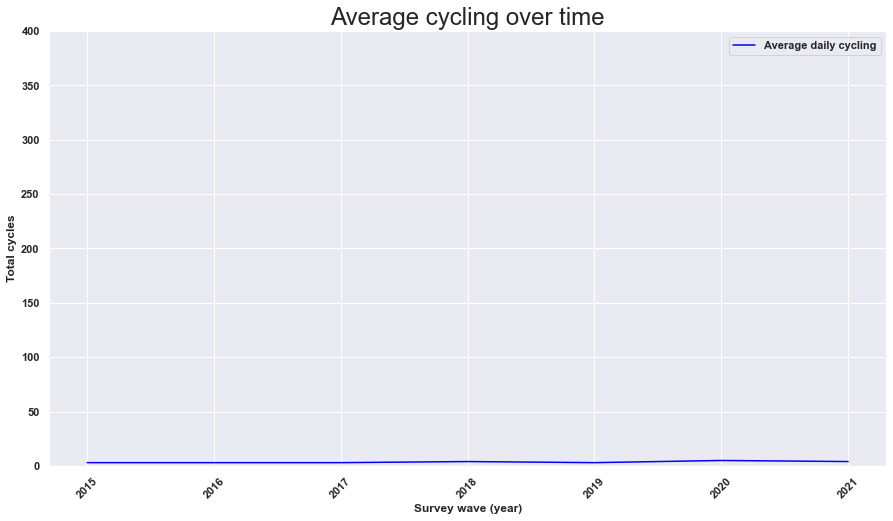

In [44]:
# Line graph plotting average daily cycling over time.

sns.lineplot(x = 'Survey wave (year)', y = 'Total cycles', data=year, ci=None, color='blue', 
             label='Average daily cycling')

plt.xticks(rotation=45)
plt.ylim(0, 400)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.title('Average cycling over time', size = 24)
plt.legend()
plt.savefig('Average cycling per borough per year.png')
plt.show()

In [21]:
# Data frame of average daily cycles in Central London per year. 
central_cycles = borough_cycles[borough_cycles['Functional cycling area'] == 'Central']
central_cycles = central_cycles[['Survey Year', 'Average daily cycles']]
central_cycles = central_cycles.groupby(['Survey Year'],  as_index=False).mean().round()
central_cycles = central_cycles[central_cycles['Survey Year'] != 2014]

#View Dataframe.
central_cycles

,Survey Year,Average daily cycles
1,2015,522.0
2,2016,537.0
3,2017,543.0
4,2018,586.0
5,2019,585.0
6,2020,684.0
7,2021,617.0


In [22]:
# Data frame of average daily cycles in Inner London per year. 
inner_cycles = borough_cycles[borough_cycles['Functional cycling area'] == 'Inner']
inner_cycles = inner_cycles[['Survey Year', 'Average daily cycles']]
inner_cycles = inner_cycles.groupby(['Survey Year'],  as_index=False).mean().round()
inner_cycles = inner_cycles[inner_cycles['Survey Year'] != 2014]

#View Dataframe.
inner_cycles

,Survey Year,Average daily cycles
1,2015,326.0
2,2016,303.0
3,2017,309.0
4,2018,321.0
5,2019,302.0
6,2020,468.0
7,2021,409.0


In [23]:
# Data frame of average daily cycles in Outer London per year.
outer_cycles = borough_cycles[borough_cycles['Functional cycling area'] == 'Outer']
outer_cycles = outer_cycles[['Survey Year', 'Average daily cycles']]
outer_cycles = outer_cycles.groupby(['Survey Year'],  as_index=False).mean().round()
outer_cycles = outer_cycles[outer_cycles['Survey Year'] != 2014]

#View Dataframe.
outer_cycles

,Survey Year,Average daily cycles
1,2015,122.0
2,2016,117.0
3,2017,123.0
4,2018,132.0
5,2019,110.0
6,2020,200.0
7,2021,144.0


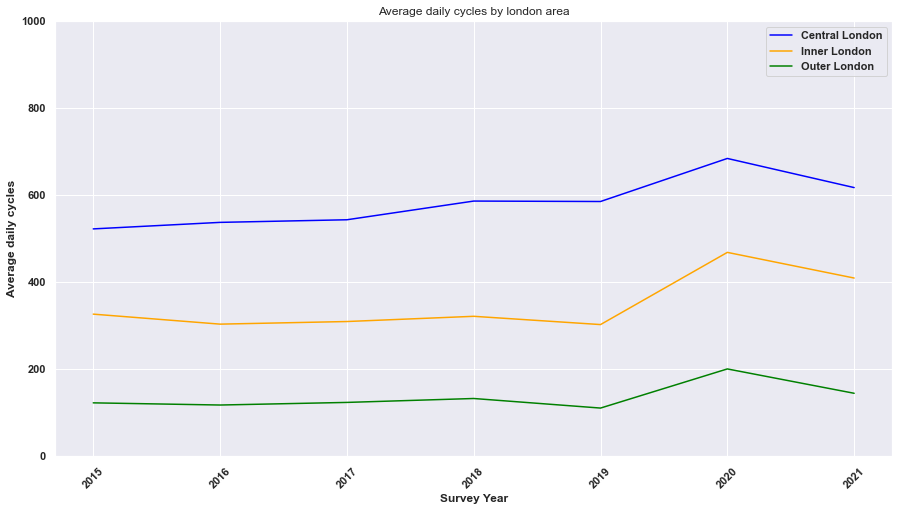

In [24]:
# Line graph plotting average daily cycling over time by area in London
sns.lineplot(x = 'Survey Year', y = 'Average daily cycles', data=central_cycles, ci=None, color='blue', 
             label='Central London')

sns.lineplot(x = 'Survey Year', y = 'Average daily cycles', data=inner_cycles, ci=None, color='orange', 
             label='Inner London')

sns.lineplot(x = 'Survey Year', y = 'Average daily cycles', data=outer_cycles, ci=None, color='green', 
             label='Outer London')

plt.xticks(rotation=45)
plt.ylim(0, 1000)
plt.title('Average daily cycles by london area')
plt.ylabel('Average daily cycles')
plt.legend()
plt.savefig('Average cycles by london area.png')
plt.show()

In [25]:
# Data is grouped by borough and shows the average daily cycles per borough.
borough = borough_cycles[['Borough', 'Average daily cycles']]
borough = borough.groupby(['Borough'],as_index=False).mean().round()
borough = borough.reset_index().sort_values(by='Average daily cycles', ascending=False)

# The top 8 boroughs are filtered for a visualisation. 
borough = borough[borough['Average daily cycles'] > 420]
borough


,index,Borough,Average daily cycles
6,6,City of London,1009.0
17,17,Islington,650.0
11,11,Hackney,640.0
26,26,Southwark,547.0
31,31,Westminster,540.0
5,5,Camden,519.0
20,20,Lambeth,462.0
12,12,Hammersmith & Fulham,424.0


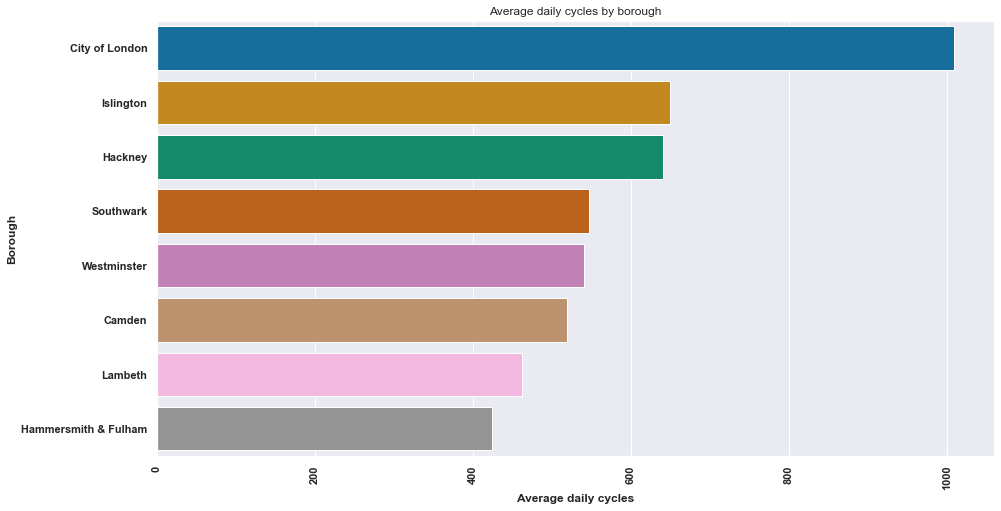

In [26]:
# Bar plot to show the top 8 average daily cycles by borough.
sns.barplot(x='Average daily cycles', y='Borough', data=borough,
            palette='colorblind', orient='h').set(title='Average daily cycles by borough')
plt.xticks(rotation=90)
plt.savefig('BoroughDailyCycles.png', bbox_inches='tight', dpi=150)


### Summary and observations

The trend of cycling over time increases overall gradually, however there is a large increase in 2020. When separating by London area, this trend can be seen in all 3, with cycling being more prominant going from Central to Outer. 

The bar chart was selected for easier comparison of seeing most cyclists per borough. It is clear the City of London has the most, followed by Islington and Hackney which border eachother.

# Is there a relationship between road traffic and cycling?

In [27]:
# Import road traffic data.
road_traffic_raw = pd.read_csv('road_traffic.csv')

# View the traffic dataframe.
road_traffic_raw.head()

C:\Users\jakee\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Count_point_id,Direction_of_travel,Year,Count_date,hour,Region_id,Region_name,Region_ons_code,Local_authority_id,Local_authority_name,...,Buses_and_coaches,LGVs,HGVs_2_rigid_axle,HGVs_3_rigid_axle,HGVs_4_or_more_rigid_axle,HGVs_3_or_4_articulated_axle,HGVs_5_articulated_axle,HGVs_6_articulated_axle,All_HGVs,All_motor_vehicles
0,37778,S,2011,2011-06-07 00:00:00,11,10,West Midlands,E12000005,69,Worcestershire,...,1.0,75,26.0,4.0,2.0,6.0,5,4.0,47.0,429.0
1,37778,S,2011,2011-06-07 00:00:00,12,10,West Midlands,E12000005,69,Worcestershire,...,1.0,58,11.0,4.0,4.0,1.0,9,8.0,37.0,361.0
2,37778,S,2011,2011-06-07 00:00:00,13,10,West Midlands,E12000005,69,Worcestershire,...,0.0,71,4.0,0.0,4.0,0.0,1,6.0,15.0,477.0
3,37778,S,2011,2011-06-07 00:00:00,14,10,West Midlands,E12000005,69,Worcestershire,...,8.0,66,15.0,6.0,0.0,1.0,4,6.0,32.0,509.0
4,37778,S,2011,2011-06-07 00:00:00,15,10,West Midlands,E12000005,69,Worcestershire,...,8.0,65,12.0,3.0,2.0,0.0,0,11.0,28.0,528.0


In [28]:
# Filter road traffic for London, then columns are droppeds to keep year, date and motor vehicle count. T
road_traffic = road_traffic_raw[road_traffic_raw['Region_name'] == 'London']
road_traffic = road_traffic[['Year', 'Count_date', 'All_motor_vehicles']]
road_traffic = road_traffic.groupby(['Year', 'Count_date'],as_index=False).sum()

# The data is finally grouped by year giving daily average motor vehicles counted.
road_traffic = road_traffic[['Year', 'All_motor_vehicles']] 
road_traffic = road_traffic.groupby(['Year'],as_index=False).mean().round()

#View Dataframe. 
road_traffic


,Year,All_motor_vehicles
0,2000,160502.0
1,2001,163190.0
2,2002,144202.0
3,2003,171397.0
4,2004,136031.0
5,2005,124867.0
6,2006,118230.0
7,2007,122055.0
8,2008,141454.0
9,2009,161691.0


In [29]:
# Rename column name to prepare to merge. 

road_traffic = road_traffic.rename(columns = {'Year' : 'Survey Year'})

# Merge with yearly cycling data.

year_traffic = pd.merge(year, road_traffic, on=['Survey Year'])

#View Dataframe. 
year_traffic

,Survey Year,Average daily cycles,All_motor_vehicles
0,2015,242.0,129534.0
1,2016,235.0,78142.0
2,2017,241.0,100226.0
3,2018,256.0,90673.0
4,2019,238.0,101744.0
5,2020,351.0,74176.0
6,2021,292.0,100636.0


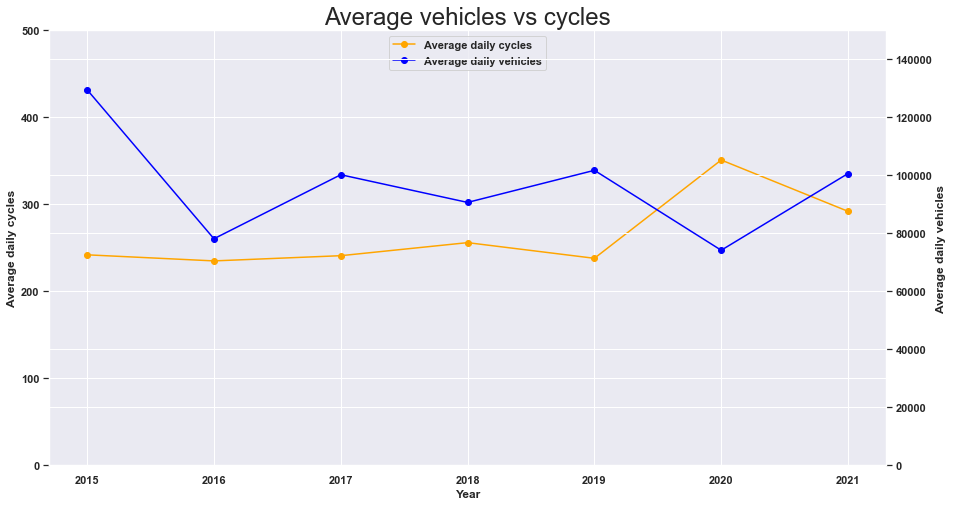

In [30]:
# Plotting average daily vehicles and average daily cycles over time.

# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
lns1 = ax.plot(year_traffic['Survey Year'], year_traffic['Average daily cycles'], color="orange", 
               marker="o", label = 'Average daily cycles')
# set x-axis label
ax.set_xlabel("Year", fontsize = 12)
# set y-axis label
ax.set_ylabel("Average daily cycles", fontsize=12)
ax.set_ylim([0,500])

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
lns2 = ax2.plot(year_traffic['Survey Year'], year_traffic['All_motor_vehicles'],color="blue",marker="o",
                label = 'Average daily vehicles')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper center')

ax2.set_ylabel("Average daily vehicles", fontsize=12)
ax2.set_ylim([0,150000])

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.title('Average vehicles vs cycles', size = 24)
plt.show()

# save the plot as a file.
fig.savefig('Vehicles_vs_cycles.jpg', format='jpeg', dpi=100, bbox_inches='tight')

### Summary and Observations

Plotting both average daily cycles and road traffic over time on the same graph shows there is some type relationship between vehicles on the road and cycling, especially when observing 2019-2021. Further research finds sources that find a similar conclusion due to saftey. 

# What demographics are cycling less?

## Private vs Hire Cycles

In [31]:
# Data is imported with intent of using private and hire cycle data from Central London.
hire_central = pd.read_csv('central.csv')
hire_central = hire_central.drop(['Survey Year'], axis = 1)
hire_central = hire_central.rename(columns = {'Survey wave':'Survey Year', 'Survey date':'Survey Date'})
hire_central

,Survey Year,Equivalent financial quarter,Site ID,Location,Survey Day of Week,Survey Date,Survey Month and Year,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total Cycles Calculated,Total cycles
0,2014,2013-14 Q4,CENCY001,Millbank (south of Thorney Street),Friday,24/01/2014,01/14,Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6,0,0.0,0.0,0.0,0
1,2014,2013-14 Q4,CENCY001,Millbank (south of Thorney Street),Friday,24/01/2014,01/14,Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6,15,15.0,0.0,15.0,15
2,2014,2013-14 Q4,CENCY001,Millbank (south of Thorney Street),Friday,24/01/2014,01/14,Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6,30,35.0,0.0,35.0,35
3,2014,2013-14 Q4,CENCY001,Millbank (south of Thorney Street),Friday,24/01/2014,01/14,Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6,45,59.0,2.0,61.0,61
4,2014,2013-14 Q4,CENCY001,Millbank (south of Thorney Street),Friday,24/01/2014,01/14,Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7,0,73.0,0.0,73.0,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758158,2021,2021-22 Q3,CENCY702,Haymarket,Tuesday,21/12/2021,12/21,Dry,2045 - 2100,Evening (19:00-22:00),Southbound,20,45,22.0,1.0,23.0,23
758159,2021,2021-22 Q3,CENCY702,Haymarket,Tuesday,21/12/2021,12/21,Dry,2100 - 2115,Evening (19:00-22:00),Southbound,21,0,20.0,0.0,20.0,20
758160,2021,2021-22 Q3,CENCY702,Haymarket,Tuesday,21/12/2021,12/21,Dry,2115 - 2130,Evening (19:00-22:00),Southbound,21,15,16.0,1.0,17.0,17
758161,2021,2021-22 Q3,CENCY702,Haymarket,Tuesday,21/12/2021,12/21,Dry,2130 - 2145,Evening (19:00-22:00),Southbound,21,30,10.0,1.0,11.0,11


In [32]:
# Data is imported with intent of using private and hire cycle data from Inner London.
hire_inner = pd.read_csv('inner.csv')
hire_inner = hire_inner.rename(columns = {'Survey wave (year)':'Survey Year',  'Survey date':'Survey Date'})
hire_inner

,Survey Year,Site ID,Location,Survey Date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Calculated_Total_Cycles,Total cycles
0,2015,INNCY001,Grove Road,20/05/2015,Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,1,0,1,1
1,2015,INNCY001,Grove Road,20/05/2015,Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,2,0,2,2
2,2015,INNCY001,Grove Road,20/05/2015,Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,2,0,2,2
3,2015,INNCY001,Grove Road,20/05/2015,Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,4,0,4,4
4,2015,INNCY001,Grove Road,20/05/2015,Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,4,0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521019,2021,INNCY597,Augustus Road,26/05/2021,Dry,2045 - 2100,Evening (19:00-22:00),Westbound,20.0,45.0,3,0,3,3
521020,2021,INNCY597,Augustus Road,26/05/2021,Dry,2100 - 2115,Evening (19:00-22:00),Westbound,21.0,0.0,2,0,2,2
521021,2021,INNCY597,Augustus Road,26/05/2021,Dry,2115 - 2130,Evening (19:00-22:00),Westbound,21.0,15.0,2,0,2,2
521022,2021,INNCY597,Augustus Road,26/05/2021,Dry,2130 - 2145,Evening (19:00-22:00),Westbound,21.0,30.0,2,0,2,2


In [33]:
# Both dataframes drop unnecessary columns to keep private and hire cycles.
hire_central = hire_central[['Location', 'Survey Date', 'Survey Year', 'Number of private cycles', 'Number of cycle hire bikes']]
hire_inner = hire_inner[['Location', 'Survey Date', 'Survey Year', 'Number of private cycles', 'Number of cycle hire bikes']]

In [34]:
# Central and Inner London data frames are merged by rows as they have idential columns.
london_hire = pd.concat([hire_central, hire_inner])

# Check the information of the dataset.
print(london_hire)

                                  Location Survey Date  Survey Year  \
0       Millbank (south of Thorney Street)  24/01/2014         2014   
1       Millbank (south of Thorney Street)  24/01/2014         2014   
2       Millbank (south of Thorney Street)  24/01/2014         2014   
3       Millbank (south of Thorney Street)  24/01/2014         2014   
4       Millbank (south of Thorney Street)  24/01/2014         2014   
...                                    ...         ...          ...   
521019                       Augustus Road  26/05/2021         2021   
521020                       Augustus Road  26/05/2021         2021   
521021                       Augustus Road  26/05/2021         2021   
521022                       Augustus Road  26/05/2021         2021   
521023                       Augustus Road  26/05/2021         2021   

        Number of private cycles  Number of cycle hire bikes  
0                            0.0                         0.0  
1                    

In [35]:
# London_hire data frame then sums by survey date and location before finding the mean for each location and year. This is 
# to avoid the number of surveys not being equal per location. The year 2014 has been excluded as there are not as many results
# and it skews the data.
london_hire = london_hire.groupby(['Location','Survey Year', 'Survey Date'], as_index=False).sum()

london_hire = london_hire[['Location', 'Survey Year', 'Number of private cycles', 'Number of cycle hire bikes']]
london_hire = london_hire.groupby(['Location','Survey Year'],as_index=False).mean().round()

london_hire = london_hire.rename(columns = {'Number of private cycles' : 'Average number of private cycles',
                                            'Number of cycle hire bikes' : 'Average number of hire cycles'})

# 2014 only had a few entries an has visably outlying values.
london_hire = london_hire[london_hire['Survey Year'] != 2014]

#View Dataframe. 
london_hire

,Location,Survey Year,Average number of private cycles,Average number of hire cycles
0,Aboyne Road,2015,200.0,0.0
1,Aboyne Road,2016,185.0,0.0
2,Aboyne Road,2017,196.0,1.0
3,Aboyne Road,2018,147.0,0.0
4,Aboyne Road,2019,176.0,0.0
...,...,...,...,...
5425,Zetland Street,2016,16.0,2.0
5426,Zetland Street,2017,17.0,1.0
5427,Zetland Street,2018,11.0,0.0
5428,Zetland Street,2019,15.0,3.0


In [36]:
# london hire is merged with bike sites to match location to borough.

bike_sites_cycles_hire = pd.merge(bike_sites, london_hire, on=['Location'])

#View Dataframe. 
bike_sites_cycles_hire

,Functional cycling area,Borough,Location,Survey Year,Average number of private cycles,Average number of hire cycles
0,Outer,Hillingdon,Long Lane,2015,522.0,52.0
1,Outer,Hillingdon,Long Lane,2016,703.0,62.0
2,Outer,Hillingdon,Long Lane,2017,423.0,43.0
3,Outer,Hillingdon,Long Lane,2018,407.0,37.0
4,Outer,Hillingdon,Long Lane,2019,276.0,33.0
...,...,...,...,...,...,...
5624,Inner,Tower Hamlets,Bow Creek,2017,196.0,1.0
5625,Inner,Tower Hamlets,Bow Creek,2018,109.0,0.0
5626,Inner,Tower Hamlets,Bow Creek,2019,52.0,0.0
5627,Inner,Tower Hamlets,Bow Creek,2020,200.0,4.0


In [37]:
# Borough hire is created by grouping by survey year and borough, giving average daily private and hire cycles.

borough_hire = bike_sites_cycles_hire.groupby(['Functional cycling area', 'Borough', 'Survey Year'], 
                                                as_index=False).mean().round()    
#View Dataframe. 
borough_hire

,Functional cycling area,Borough,Survey Year,Average number of private cycles,Average number of hire cycles
0,Central,Camden,2015,447.0,33.0
1,Central,Camden,2016,444.0,34.0
2,Central,Camden,2017,410.0,32.0
3,Central,Camden,2018,439.0,36.0
4,Central,Camden,2019,424.0,36.0
...,...,...,...,...,...
219,Outer,Waltham Forest,2017,351.0,18.0
220,Outer,Waltham Forest,2018,360.0,20.0
221,Outer,Waltham Forest,2019,573.0,16.0
222,Outer,Waltham Forest,2020,603.0,11.0


In [38]:
# Data is grouped by year.
hire = borough_hire[['Survey Year', 'Average number of private cycles', 'Average number of hire cycles']]
hire = borough_hire.groupby(['Survey Year'],  as_index=False).mean().round()

#View Dataframe.
hire

,Survey Year,Average number of private cycles,Average number of hire cycles
0,2015,416.0,23.0
1,2016,440.0,24.0
2,2017,412.0,24.0
3,2018,393.0,24.0
4,2019,376.0,26.0
5,2020,512.0,34.0
6,2021,473.0,26.0


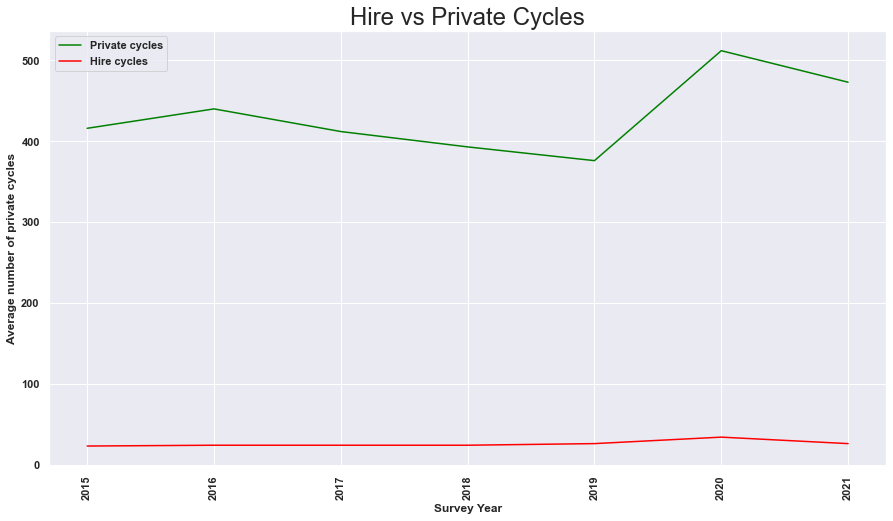

In [39]:
# Line plot of average daily private and hire cycles per borough over time.
sns.lineplot(x = 'Survey Year', y = 'Average number of private cycles', data=hire, ci=None, color='green', 
             label='Private cycles')
sns.lineplot(x = 'Survey Year', y = 'Average number of hire cycles', data=hire, ci=None, color='red', 
             label='Hire cycles')
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.xticks(rotation=90)
plt.title('Hire vs Private Cycles', size = 24)
plt.legend()
plt.savefig('HirevsPrivate.png')
plt.show()

In [40]:
# Data is grouped to show average daily cycles per borough, data is then sorted by hire cycles.

borough_hire_overall = borough_hire[['Functional cycling area','Borough', 
                                    'Average number of private cycles', 'Average number of hire cycles']]

borough_hire_overall = borough_hire_overall.groupby(['Functional cycling area','Borough'],  as_index=False).mean().round()
borough_hire_overall = borough_hire_overall.reset_index().sort_values(by='Average number of hire cycles', ascending=False)

#View Dataframe. 
borough_hire_overall

,index,Functional cycling area,Borough,Average number of private cycles,Average number of hire cycles
1,1,Central,City of London,901.0,113.0
4,4,Central,Westminster,454.0,67.0
28,28,Outer,Redbridge,674.0,48.0
24,24,Outer,Hillingdon,432.0,44.0
15,15,Outer,Barnet,432.0,44.0
16,16,Outer,Bexley,381.0,42.0
9,9,Inner,Kensington & Chelsea,369.0,42.0
19,19,Outer,Croydon,678.0,39.0
0,0,Central,Camden,446.0,36.0
23,23,Outer,Havering,924.0,33.0


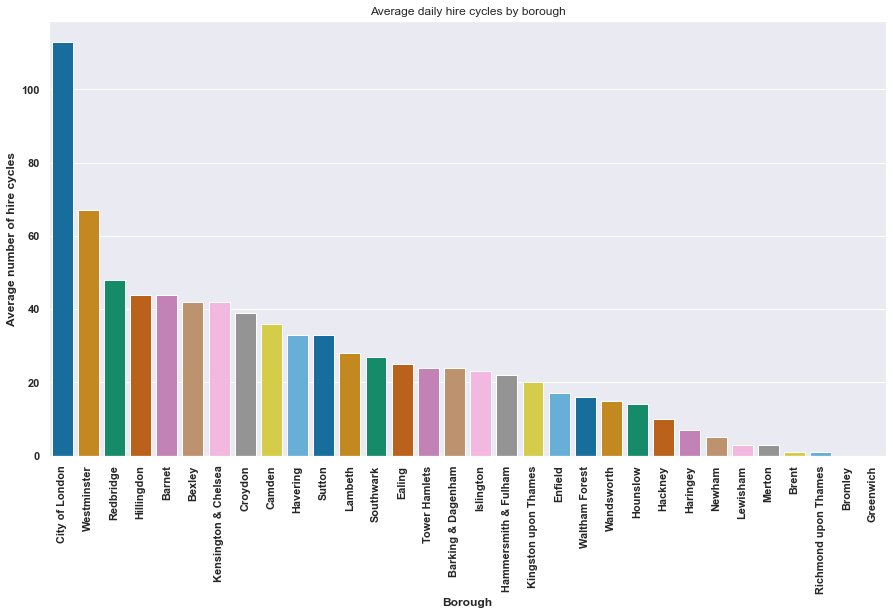

In [41]:
# Bar plot of the most hire daily cycles per borough to give easy comparison.

sns.barplot(x='Borough', y='Average number of hire cycles', data=borough_hire_overall,
            palette='colorblind').set(title='Average daily hire cycles by borough')
plt.xticks(rotation=90)
plt.savefig('HighBoroughOverall.png', bbox_inches='tight', dpi=150)

In [42]:
# Data is filtered to give the top 8 hire cycles by borough.
borough_hire_overall = borough_hire_overall.reset_index().sort_values(by='Average number of hire cycles', ascending=False)
borough_hire_top = borough_hire_overall[borough_hire_overall['Average number of hire cycles'] > 37]

#View Dataframe. 
borough_hire_top

,level_0,index,Functional cycling area,Borough,Average number of private cycles,Average number of hire cycles
0,1,1,Central,City of London,901.0,113.0
1,4,4,Central,Westminster,454.0,67.0
2,28,28,Outer,Redbridge,674.0,48.0
3,24,24,Outer,Hillingdon,432.0,44.0
4,15,15,Outer,Barnet,432.0,44.0
5,16,16,Outer,Bexley,381.0,42.0
6,9,9,Inner,Kensington & Chelsea,369.0,42.0
7,19,19,Outer,Croydon,678.0,39.0


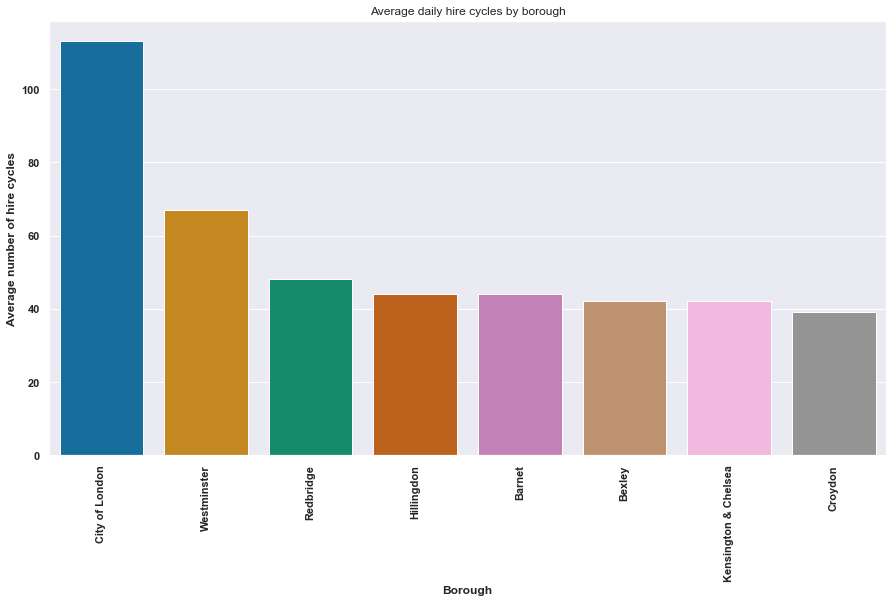

In [43]:
# Bar plot of the top 8 average hire daily cycles per borough to give easy comparison.
sns.barplot(x='Borough', y='Average number of hire cycles', data=borough_hire_top,
            palette='colorblind').set(title='Average daily hire cycles by borough')
plt.xticks(rotation=90)
plt.savefig('HireBoroughTop.png', bbox_inches='tight', dpi=150)

In [44]:
#Sort by highest average number of private cycles 
borough_hire_overall = borough_hire_overall.drop(['index'], axis = 1)
borough_hire_overall = borough_hire_overall.reset_index().sort_values(by='Average number of private cycles', ascending=False)

#View Dataframe. 
borough_hire_overall

,index,level_0,Functional cycling area,Borough,Average number of private cycles,Average number of hire cycles
10,10,30,Outer,Sutton,924.0,33.0
9,9,23,Outer,Havering,924.0,33.0
0,0,1,Central,City of London,901.0,113.0
7,7,19,Outer,Croydon,678.0,39.0
2,2,28,Outer,Redbridge,674.0,48.0
16,16,8,Inner,Islington,612.0,23.0
23,23,6,Inner,Hackney,554.0,10.0
20,20,31,Outer,Waltham Forest,533.0,16.0
15,15,14,Outer,Barking & Dagenham,506.0,24.0
12,12,3,Central,Southwark,485.0,27.0


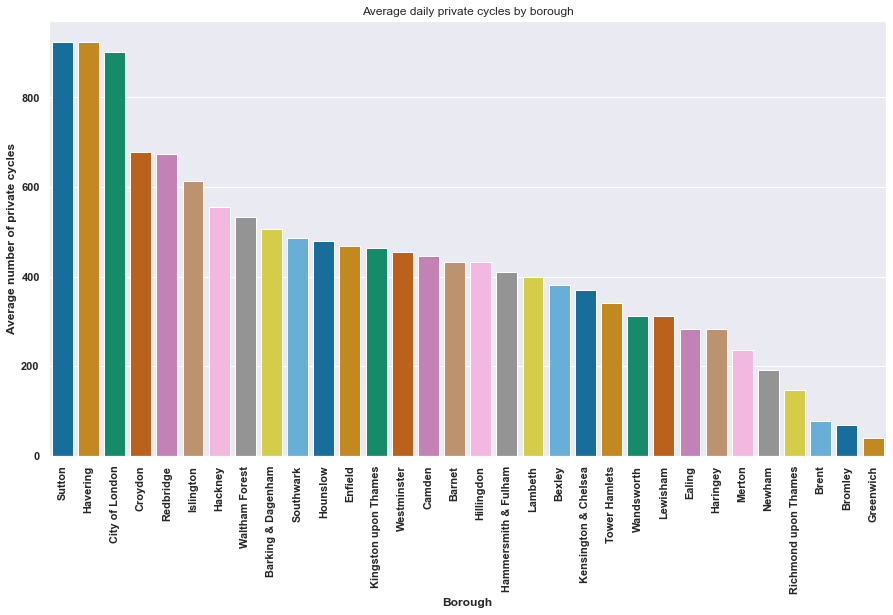

In [45]:
# Bar plot of the most private daily cycles per borough to give easy comparison.
sns.barplot(x='Borough', y='Average number of private cycles', data=borough_hire_overall,
            palette='colorblind').set(title='Average daily private cycles by borough')
plt.xticks(rotation=90)
plt.savefig('PrivateoroughOverall.png', bbox_inches='tight', dpi=150)

In [46]:
# Data is filtered to give the top 8 hire cycles by borough.
borough_private_top = borough_hire_overall[borough_hire_overall['Average number of private cycles'] > 530]

#Veiw Dataframe. 
borough_private_top

,index,level_0,Functional cycling area,Borough,Average number of private cycles,Average number of hire cycles
10,10,30,Outer,Sutton,924.0,33.0
9,9,23,Outer,Havering,924.0,33.0
0,0,1,Central,City of London,901.0,113.0
7,7,19,Outer,Croydon,678.0,39.0
2,2,28,Outer,Redbridge,674.0,48.0
16,16,8,Inner,Islington,612.0,23.0
23,23,6,Inner,Hackney,554.0,10.0
20,20,31,Outer,Waltham Forest,533.0,16.0


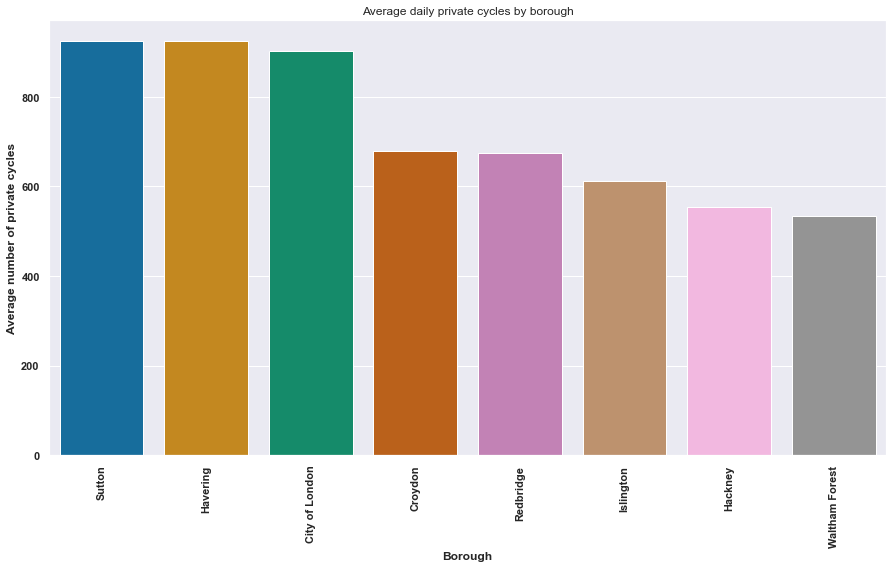

In [47]:
# Bar plot of the top 8 average daily cycles per borough to give easy comparison.
sns.barplot(x='Borough', y='Average number of private cycles', data=borough_private_top,
            palette='colorblind').set(title='Average daily private cycles by borough')
plt.xticks(rotation=90)
plt.savefig('PrivateeBoroughTop.png', bbox_inches='tight', dpi=150)

In [48]:
# Hire and private cycles is filtered by Outer London to give average daily cycles per year.
outer_hire = borough_hire[borough_hire['Functional cycling area'] == 'Outer']
outer_hire = outer_hire[['Survey Year', 'Average number of private cycles', 'Average number of hire cycles']]
outer_hire = outer_hire.groupby(['Survey Year'],  as_index=False).mean().round()
outer_hire = outer_hire[outer_hire['Survey Year'] != 2014]

#View Dataframe. 
outer_hire

,Survey Year,Average number of private cycles,Average number of hire cycles
0,2015,443.0,21.0
1,2016,491.0,23.0
2,2017,439.0,22.0
3,2018,397.0,20.0
4,2019,369.0,21.0
5,2020,501.0,29.0
6,2021,469.0,24.0


In [49]:
# Hire and private cycles is filtered by Central London to give average daily cycles per year. 
central_hire = borough_hire[borough_hire['Functional cycling area'] == 'Central']
central_hire = central_hire[['Survey Year', 'Average number of private cycles', 'Average number of hire cycles']]
central_hire = central_hire.groupby(['Survey Year'],  as_index=False).mean().round()
central_hire = central_hire[central_hire['Survey Year'] != 2014]

#View Dataframe. 
central_hire

,Survey Year,Average number of private cycles,Average number of hire cycles
0,2015,486.0,45.0
1,2016,498.0,48.0
2,2017,502.0,49.0
3,2018,537.0,56.0
4,2019,535.0,58.0
5,2020,629.0,65.0
6,2021,570.0,57.0


In [50]:
# Hire and private cycles is filtered by Inner London to give average daily cycles per year. 

inner_hire = borough_hire[borough_hire['Functional cycling area'] == 'Inner']
inner_hire = inner_hire[['Survey Year', 'Average number of private cycles', 'Average number of hire cycles']]
inner_hire = inner_hire.groupby(['Survey Year'],  as_index=False).mean().round()
inner_hire = inner_hire[inner_hire['Survey Year'] != 2014]

#View Dataframe. 
inner_hire

,Survey Year,Average number of private cycles,Average number of hire cycles
0,2015,324.0,13.0
1,2016,305.0,13.0
2,2017,307.0,14.0
3,2018,305.0,15.0
4,2019,304.0,18.0
5,2020,470.0,26.0
6,2021,427.0,14.0


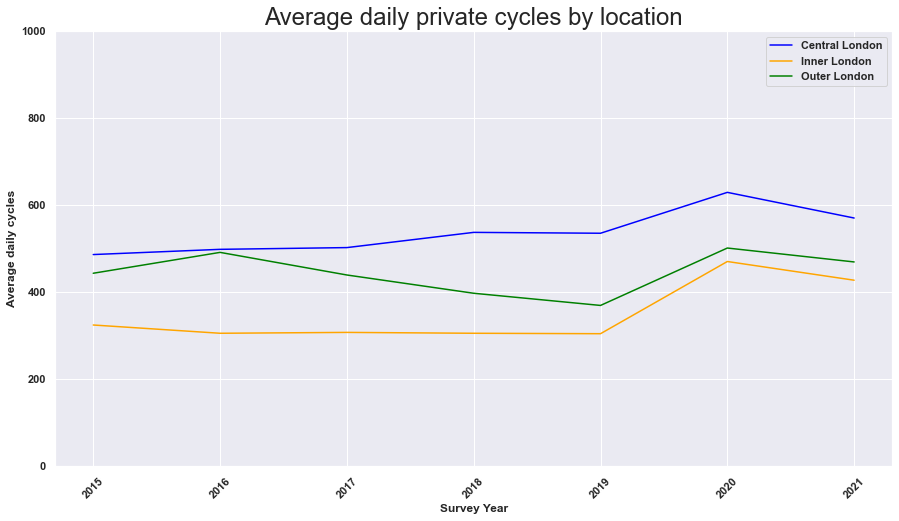

In [51]:
# Line graph plotting average daily private cycles over time by area in London.
sns.lineplot(x = 'Survey Year', y = 'Average number of private cycles', data=central_hire, ci=None, color='blue', 
             label='Central London')

sns.lineplot(x = 'Survey Year', y = 'Average number of private cycles', data=inner_hire, ci=None, color='orange', 
             label='Inner London')

sns.lineplot(x = 'Survey Year', y = 'Average number of private cycles', data=outer_hire, ci=None, color='green', 
             label='Outer London')

plt.xticks(rotation=45)
plt.ylim(0, 1000)

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.title('Average daily private cycles by location', size = 24)
plt.ylabel('Average daily cycles')
plt.legend()
plt.savefig('Average private cycles by location.png')
plt.show()

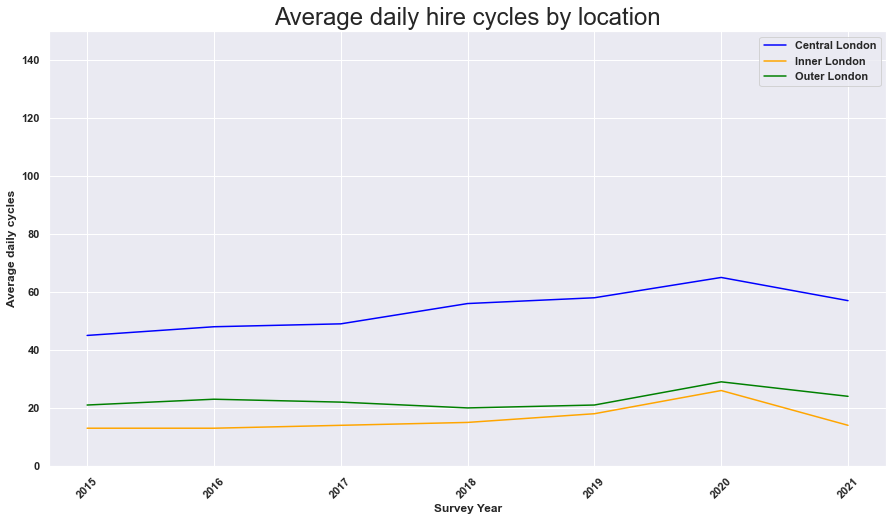

In [52]:
# Line graph plotting average daily hire cycles over time by area in London.
sns.lineplot(x = 'Survey Year', y = 'Average number of hire cycles', data=central_hire, ci=None, color='blue', 
             label='Central London')

sns.lineplot(x = 'Survey Year', y = 'Average number of hire cycles', data=inner_hire, ci=None, color='orange', 
             label='Inner London')

sns.lineplot(x = 'Survey Year', y = 'Average number of hire cycles', data=outer_hire, ci=None, color='green', 
             label='Outer London')
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"


plt.xticks(rotation=45)
plt.ylim(0, 150)
plt.title('Average daily hire cycles by location', size = 24)
plt.ylabel('Average daily cycles')
plt.legend()
plt.savefig('Average hire cycles by location.png')
plt.show()

### Summary and Observation

It is clear there are more cyclists with private cycles than hired cycles. By area private cyclists are relatively similar, with Outer London having more than Inner on average per year, whereas hired bikes are far more popular in Central London, followed by Inner and Outer. This makes sense as hired schemes are utilised far more within Central London plus people commute there to work. 

A bar chart shows that the City of London had by far the most hired cycles followed by Westminster, whereas Sutton and Havering had slightly more private cycles than the City of London. 

Despite there being values for Outer London however, the original outer London data set did not include hire or private cycles, it was through merging with bike sites that determined some locations were in Outer London meaning it is hharder to determine the accuracy. 

## Gender

In [53]:
# Data is imported with intent of using gender cycle data from Outer London.
gender_outer = pd.read_csv('outer.csv')
gender_outer = gender_outer.rename(columns = {'Survey wave (year)':'Survey Year',  'Survey date':'Survey Date'})

#View Dataframe. 
gender_outer

,Survey Year,Site ID,Location,Survey Date,Weather,Time,Period,Direction,Start hour,Start minute,Number of male cycles,Number of female cycles,Number of unknown cycles,Total cycles
0,2015,OUTCY001,High Road Leyton,26/06/15,Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6,0,2,1,0,3
1,2015,OUTCY001,High Road Leyton,26/06/15,Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6,15,3,0,0,3
2,2015,OUTCY001,High Road Leyton,26/06/15,Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6,30,2,0,0,2
3,2015,OUTCY001,High Road Leyton,26/06/15,Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6,45,4,0,0,4
4,2015,OUTCY001,High Road Leyton,26/06/15,Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7,0,4,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375655,2021,OUTCY451,Thames Path (Lower Ham Road),18/06/21,Wet,2045 - 2100,Evening (19:00-22:00),Southbound,20,45,1,0,0,1
375656,2021,OUTCY451,Thames Path (Lower Ham Road),18/06/21,Wet,2100 - 2115,Evening (19:00-22:00),Southbound,21,0,2,0,0,2
375657,2021,OUTCY451,Thames Path (Lower Ham Road),18/06/21,Wet,2115 - 2130,Evening (19:00-22:00),Southbound,21,15,0,0,0,0
375658,2021,OUTCY451,Thames Path (Lower Ham Road),18/06/21,Wet,2130 - 2145,Evening (19:00-22:00),Southbound,21,30,0,0,0,0


In [54]:
# Drop unnecessary columns. 
gender_outer = gender_outer[['Location', 'Survey Date', 'Survey Year', 'Number of male cycles', 'Number of female cycles']]

In [55]:
# Gender data frame then sums by survey date and location before finding the mean for each location and year. This is 
# to avoid the number of surveys not being equal per location. 
gender_outer = gender_outer.groupby(['Location','Survey Year', 'Survey Date'], as_index=False).sum()

gender_outer = gender_outer[['Location', 'Survey Year', 'Number of male cycles', 'Number of female cycles']]
gender_outer = gender_outer.groupby(['Location','Survey Year'],as_index=False).mean().round()

gender_outer = gender_outer.rename(columns = {'Number of male cycles' : 'Average number of male cycles',
                                            'Number of female cycles' : 'Average number of female cycles'})

# 2014 only had a few entries an has visably outlying values
gender_outer = gender_outer[gender_outer['Survey Year'] != 2014]

#View Dataframe. 
gender_outer

,Location,Survey Year,Average number of male cycles,Average number of female cycles
0,Abbey Road,2015,50.0,9.0
1,Abbey Road,2016,84.0,0.0
2,Abbey Road,2017,100.0,12.0
3,Abbey Road,2018,76.0,6.0
4,Abbey Road,2019,63.0,8.0
...,...,...,...,...
2791,York Road,2016,44.0,5.0
2792,York Road,2017,53.0,5.0
2793,York Road,2018,46.0,4.0
2794,York Road,2019,37.0,6.0


In [56]:
# london gender is merged with bike sites to match location to borough.

bike_sites_cycles_gender = pd.merge(bike_sites, gender_outer, on=['Location'])

#View Dataframe. 
bike_sites_cycles_gender

,Functional cycling area,Borough,Location,Survey Year,Average number of male cycles,Average number of female cycles
0,Outer,Hillingdon,Summerhouse Lane,2015,2.0,0.0
1,Outer,Hillingdon,Summerhouse Lane,2016,4.0,4.0
2,Outer,Hillingdon,Summerhouse Lane,2017,0.0,1.0
3,Outer,Hillingdon,Summerhouse Lane,2018,6.0,0.0
4,Outer,Hillingdon,Summerhouse Lane,2019,2.0,0.0
...,...,...,...,...,...,...
3206,Outer,Havering,Ockendon Road,2017,12.0,0.0
3207,Outer,Havering,Ockendon Road,2018,33.0,2.0
3208,Outer,Havering,Ockendon Road,2019,23.0,3.0
3209,Outer,Havering,Ockendon Road,2020,32.0,4.0


In [57]:
# Borough gender is created by grouping by survey year and male and female cycles

borough_gender = bike_sites_cycles_gender.groupby(['Functional cycling area', 'Borough', 'Survey Year'], 
                                                as_index=False).mean().round()    

#View Dataframe. 
borough_gender

,Functional cycling area,Borough,Survey Year,Average number of male cycles,Average number of female cycles
0,Central,Camden,2015,58.0,10.0
1,Central,Camden,2016,28.0,5.0
2,Central,Camden,2017,43.0,9.0
3,Central,Camden,2018,53.0,9.0
4,Central,Camden,2019,50.0,9.0
...,...,...,...,...,...
218,Outer,Waltham Forest,2017,119.0,22.0
219,Outer,Waltham Forest,2018,143.0,26.0
220,Outer,Waltham Forest,2019,88.0,19.0
221,Outer,Waltham Forest,2020,195.0,36.0


In [58]:
# Data is grouped to show average daily cycles per borough, data is then sorted by male cyclists.
borough_gender_overall = borough_gender[['Functional cycling area','Borough', 
                                    'Average number of male cycles', 'Average number of female cycles']]

borough_gender_overall = borough_gender_overall.groupby(['Functional cycling area','Borough'],  as_index=False).mean().round()
borough_gender_overall = borough_gender_overall.reset_index().sort_values(by='Average number of male cycles', 
                                                                          ascending=False)
#View Dataframe. 
borough_gender_overall

,index,Functional cycling area,Borough,Average number of male cycles,Average number of female cycles
29,29,Outer,Richmond upon Thames,201.0,52.0
25,25,Outer,Hounslow,194.0,37.0
26,26,Outer,Kingston upon Thames,176.0,32.0
4,4,Central,Westminster,169.0,38.0
1,1,Central,City of London,168.0,35.0
12,12,Inner,Tower Hamlets,147.0,16.0
3,3,Central,Southwark,139.0,20.0
10,10,Inner,Lewisham,136.0,21.0
31,31,Outer,Waltham Forest,126.0,24.0
13,13,Inner,Wandsworth,123.0,15.0


In [59]:
# Data is grouped by year.
gender = borough_gender[['Survey Year', 'Average number of male cycles', 'Average number of female cycles']]
gender = borough_gender.groupby(['Survey Year'],  as_index=False).mean().round()
gender = gender[gender['Survey Year'] != 2014]

#View Dataframe 
gender

,Survey Year,Average number of male cycles,Average number of female cycles
0,2015,79.0,12.0
1,2016,75.0,12.0
2,2017,81.0,15.0
3,2018,98.0,16.0
4,2019,79.0,14.0
5,2020,151.0,21.0
6,2021,100.0,18.0


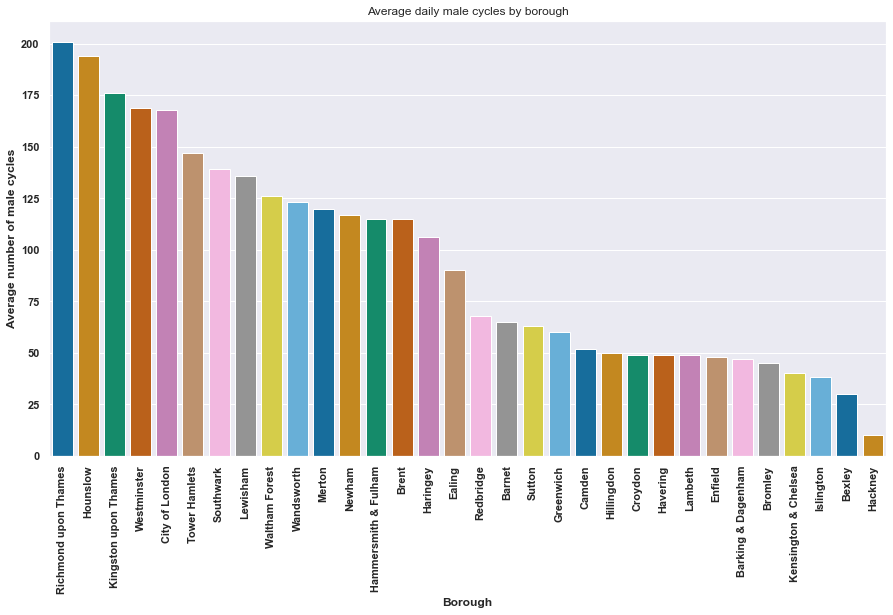

In [60]:
# Bar plot of the most average male daily cycles per borough to give easy comparison.
sns.barplot(x='Borough', y='Average number of male cycles', data=borough_gender_overall,
            palette='colorblind').set(title='Average daily male cycles by borough')
plt.xticks(rotation=90)
plt.savefig('MaleBoroughOverall.png', bbox_inches='tight', dpi=150)

In [61]:
# Data is filtered to give the top 8 male cycles by borough.
borough_gender_overall = borough_gender_overall.reset_index().sort_values(by='Average number of male cycles', ascending=False)
borough_gender_topeight = borough_gender_overall[borough_gender_overall['Average number of male cycles'] > 130]

#View Dataframe. 
borough_gender_topeight

,level_0,index,Functional cycling area,Borough,Average number of male cycles,Average number of female cycles
0,29,29,Outer,Richmond upon Thames,201.0,52.0
1,25,25,Outer,Hounslow,194.0,37.0
2,26,26,Outer,Kingston upon Thames,176.0,32.0
3,4,4,Central,Westminster,169.0,38.0
4,1,1,Central,City of London,168.0,35.0
5,12,12,Inner,Tower Hamlets,147.0,16.0
6,3,3,Central,Southwark,139.0,20.0
7,10,10,Inner,Lewisham,136.0,21.0


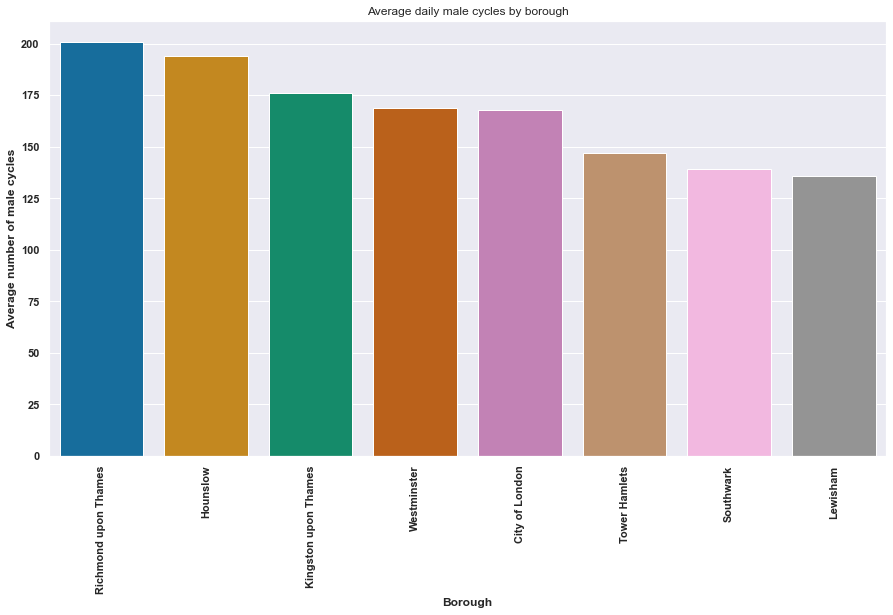

In [62]:
# Bar plot of the top 8 average male daily cycles per borough to give easy comparison.
sns.barplot(x='Borough', y='Average number of male cycles', data=borough_gender_topeight,
            palette='colorblind').set(title='Average daily male cycles by borough')
plt.xticks(rotation=90)
plt.savefig('MaleBoroughOverall.png', bbox_inches='tight', dpi=150)

In [63]:
# Data is sorted by female cycles in descending order.

borough_gender_overall = borough_gender_overall[['Borough', 'Average number of male cycles', 'Average number of female cycles']]
borough_gender_overall = borough_gender_overall.reset_index().sort_values(by='Average number of female cycles', ascending=False)

#View Dataframe. 
borough_gender_overall

,index,Borough,Average number of male cycles,Average number of female cycles
0,0,Richmond upon Thames,201.0,52.0
3,3,Westminster,169.0,38.0
1,1,Hounslow,194.0,37.0
4,4,City of London,168.0,35.0
2,2,Kingston upon Thames,176.0,32.0
8,8,Waltham Forest,126.0,24.0
7,7,Lewisham,136.0,21.0
10,10,Merton,120.0,20.0
6,6,Southwark,139.0,20.0
15,15,Ealing,90.0,20.0


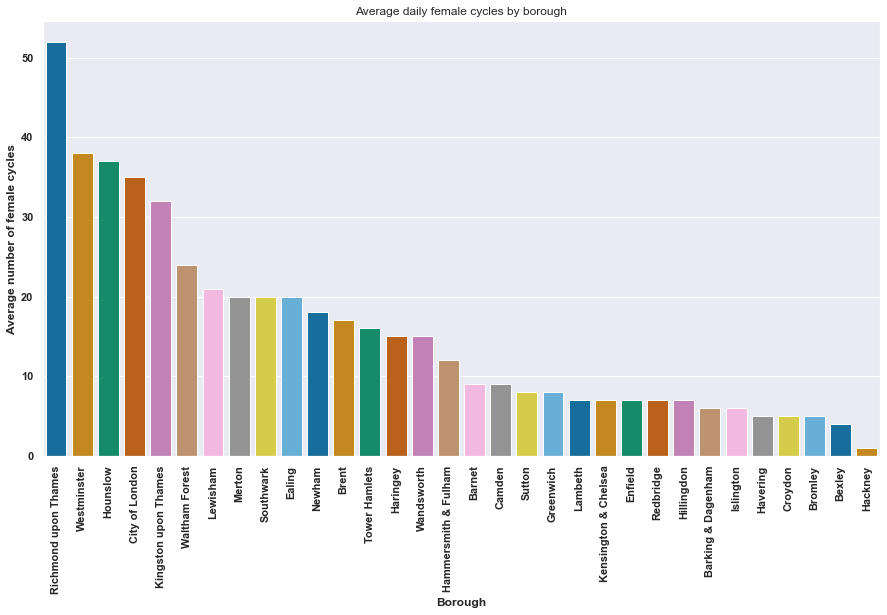

In [64]:
# Bar plot of the most average female daily cycles per borough to give easy comparison.
sns.barplot(x='Borough', y='Average number of female cycles', data=borough_gender_overall,
            palette='colorblind').set(title='Average daily female cycles by borough')
plt.xticks(rotation=90)
plt.savefig('FemaleBoroughOverall.png', bbox_inches='tight', dpi=150)

In [65]:
# Data is filtered to give the top 10 female cycles by borough

borough_gender_topten = borough_gender_overall[borough_gender_overall['Average number of female cycles'] > 18]

#View Dataframe. 
borough_gender_topten

,index,Borough,Average number of male cycles,Average number of female cycles
0,0,Richmond upon Thames,201.0,52.0
3,3,Westminster,169.0,38.0
1,1,Hounslow,194.0,37.0
4,4,City of London,168.0,35.0
2,2,Kingston upon Thames,176.0,32.0
8,8,Waltham Forest,126.0,24.0
7,7,Lewisham,136.0,21.0
10,10,Merton,120.0,20.0
6,6,Southwark,139.0,20.0
15,15,Ealing,90.0,20.0


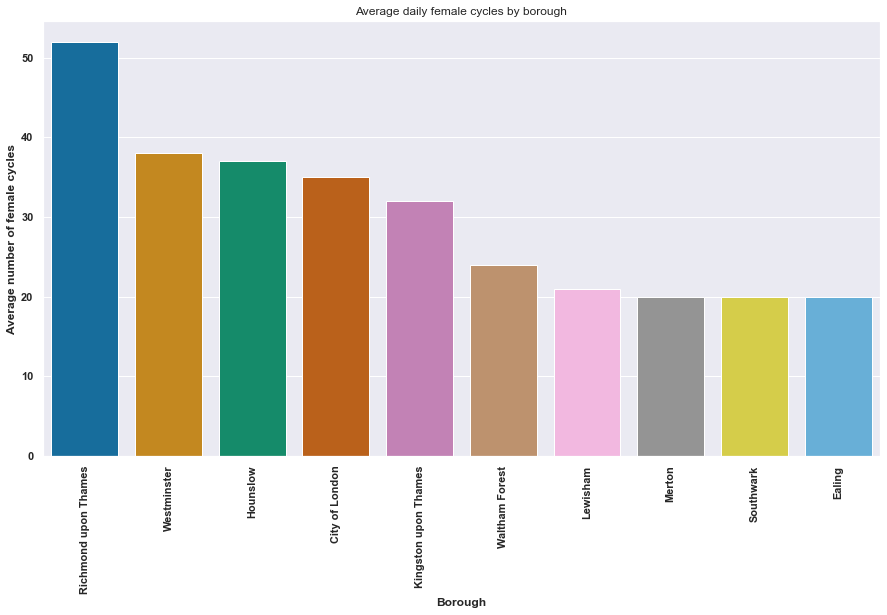

In [66]:
# Bar plot of the top 10 average daily female cycles per borough to give easy comparison.
sns.barplot(x='Borough', y='Average number of female cycles', data=borough_gender_topten,
            palette='colorblind').set(title='Average daily female cycles by borough')
plt.xticks(rotation=90)
plt.savefig('FemaleBoroughOverall.png', bbox_inches='tight', dpi=150)

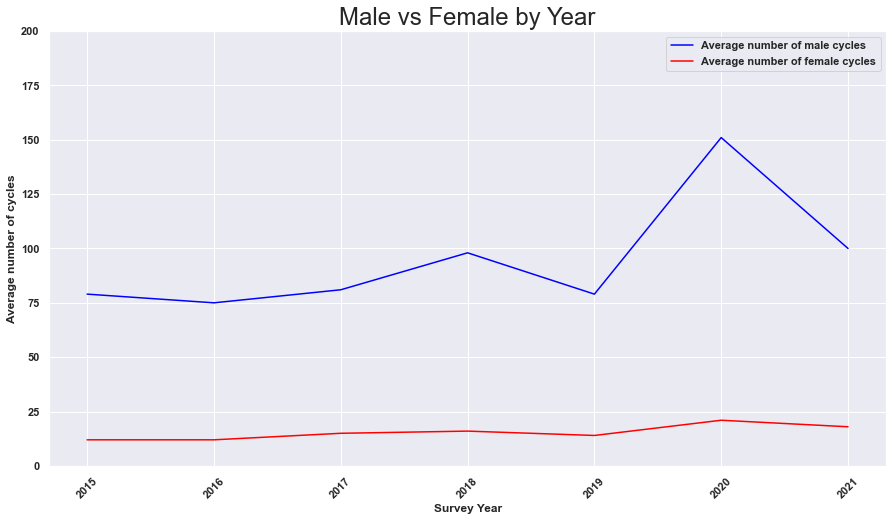

In [67]:
# Line plot of average daily male and female cycles per borough over time. 
sns.lineplot(x = 'Survey Year', y = 'Average number of male cycles', data=gender, ci=None, color='blue', 
             label='Average number of male cycles')
sns.lineplot(x = 'Survey Year', y = 'Average number of female cycles', data=gender, ci=None, color='red', 
             label='Average number of female cycles')
plt.xticks(rotation=45)
plt.ylim(0, 200)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.title('Male vs Female by Year', size =24)
plt.ylabel('Average number of cycles')
plt.legend()
plt.savefig('Male vs Female by Year.png')
plt.show()

In [68]:
# the yearly average of daily cycles is calculated for gender. 
bar_gender = gender
bar_gender['Gender'] ='Average Daily Number'


bar_gender = bar_gender.drop(['Survey Year'], axis=1)
bar_gender = bar_gender.groupby(['Gender'], as_index=True).mean().round()

#View Dataframe. 
bar_gender

,Average number of male cycles,Average number of female cycles
Gender,,
Average Daily Number,95.0,15.0


In [69]:
# Data is now prepared for a bar graph for easier comparison.
bar_gender = bar_gender.transpose()
bar_gender = bar_gender.reset_index().sort_values(by='Average Daily Number', ascending=False)
bar_gender = bar_gender.rename(columns = {'Gender' : 'Index', 'index' : 'Cyclist Gender'})

#View Dataframe. 
bar_gender

Gender,Cyclist Gender,Average Daily Number
0,Average number of male cycles,95.0
1,Average number of female cycles,15.0


In [70]:
# Labels are renamed to be clearer for viewer

bar_gender['Cyclist Gender'][0] = 'Male'
bar_gender['Cyclist Gender'][1] = 'Female'

#bar_gender

C:\Users\jakee\AppData\Local\Temp/ipykernel_30780/3111761361.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_gender['Cyclist Gender'][0] = 'Male'
C:\Users\jakee\AppData\Local\Temp/ipykernel_30780/3111761361.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_gender['Cyclist Gender'][1] = 'Female'


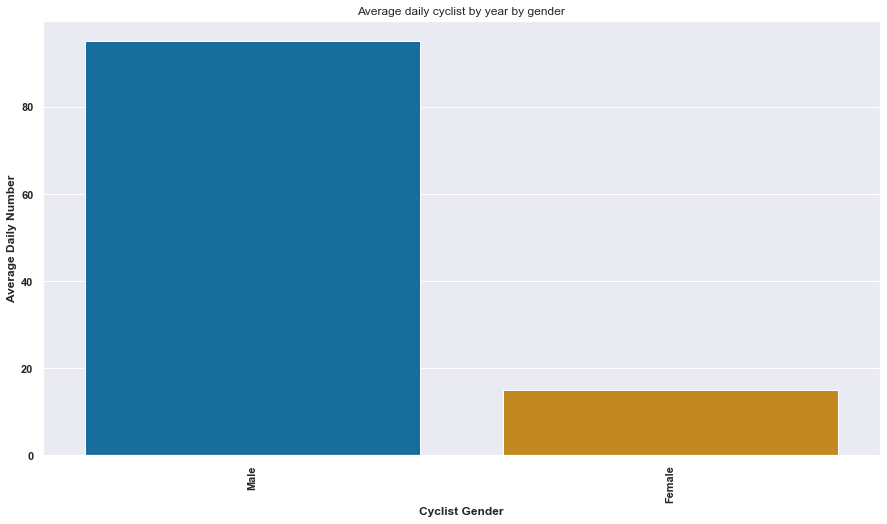

In [71]:
# Bar chart of average daily cyclists for Males and Females.
sns.barplot(x='Cyclist Gender', y='Average Daily Number', 
            data=bar_gender, palette='colorblind').set(title='Average daily cyclist by year by gender')

plt.xticks(rotation=90)
plt.savefig('GenderBar.png', bbox_inches='tight', dpi=150)

In [72]:
# Male and female cycles is filtered by Central London to give average daily cycles per year.
central_gender = borough_gender[borough_gender['Functional cycling area'] == 'Central']
central_gender = central_gender[['Survey Year', 'Average number of male cycles', 'Average number of female cycles']]
central_gender = central_gender.groupby(['Survey Year'],  as_index=False).mean().round()
central_gender = central_gender[central_gender['Survey Year'] != 2014]

#View Dataframe. 
central_gender 

,Survey Year,Average number of male cycles,Average number of female cycles
0,2015,94.0,15.0
1,2016,90.0,19.0
2,2017,101.0,19.0
3,2018,118.0,19.0
4,2019,95.0,20.0
5,2020,191.0,32.0
6,2021,119.0,27.0


In [73]:
# Male and female cycles is filtered by Inner London to give average daily cycles per year. 
inner_gender = borough_gender[borough_gender['Functional cycling area'] == 'Inner']
inner_gender = inner_gender[['Survey Year', 'Average number of male cycles', 'Average number of female cycles']]
inner_gender = inner_gender.groupby(['Survey Year'],  as_index=False).mean().round()
inner_gender = inner_gender[inner_gender['Survey Year'] != 2014]

#View Dataframe. 
inner_gender 

,Survey Year,Average number of male cycles,Average number of female cycles
0,2015,70.0,10.0
1,2016,62.0,7.0
2,2017,71.0,12.0
3,2018,91.0,12.0
4,2019,82.0,11.0
5,2020,148.0,18.0
6,2021,104.0,13.0


In [74]:
# Male and female cycles is filtered by Outer London to give average daily cycles per year. 
outer_gender = borough_gender[borough_gender['Functional cycling area'] == 'Outer']
outer_gender = outer_gender[['Survey Year', 'Average number of male cycles', 'Average number of female cycles']]
outer_gender = outer_gender.groupby(['Survey Year'],  as_index=False).mean().round()
outer_gender = outer_gender[outer_gender['Survey Year'] != 2014]

#View Dataframe. 
outer_gender 

,Survey Year,Average number of male cycles,Average number of female cycles
0,2015,80.0,13.0
1,2016,77.0,12.0
2,2017,81.0,16.0
3,2018,95.0,16.0
4,2019,73.0,13.0
5,2020,141.0,19.0
6,2021,92.0,19.0


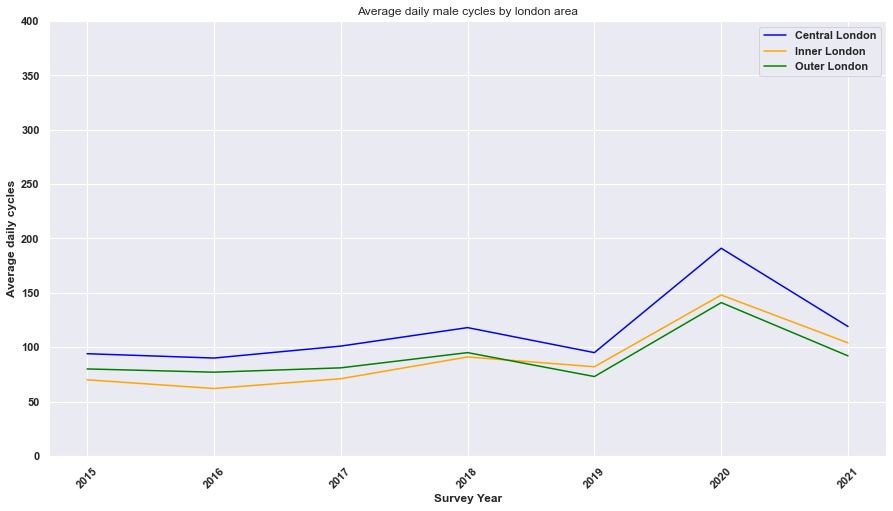

In [75]:
# Line graph plotting average daily male cycles over time by area in London. 
sns.lineplot(x = 'Survey Year', y = 'Average number of male cycles', data=central_gender, ci=None, color='blue', 
             label='Central London')

sns.lineplot(x = 'Survey Year', y = 'Average number of male cycles', data=inner_gender, ci=None, color='orange', 
             label='Inner London')

sns.lineplot(x = 'Survey Year', y = 'Average number of male cycles', data=outer_gender, ci=None, color='green', 
             label='Outer London')

plt.xticks(rotation=45)
plt.ylim(0, 400)
plt.title('Average daily male cycles by london area')
plt.ylabel('Average daily cycles')
plt.legend()
plt.savefig('Average male cycles by location.png')
plt.show()

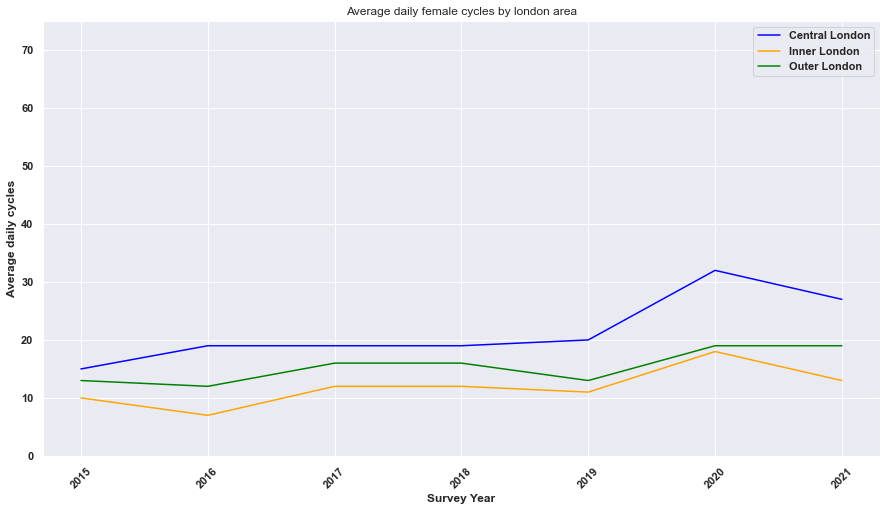

In [76]:
# Line graph plotting average daily female cycles over time by area in London.
sns.lineplot(x = 'Survey Year', y = 'Average number of female cycles', data=central_gender, ci=None, color='blue', 
             label='Central London')

sns.lineplot(x = 'Survey Year', y = 'Average number of female cycles', data=inner_gender, ci=None, color='orange', 
             label='Inner London')

sns.lineplot(x = 'Survey Year', y = 'Average number of female cycles', data=outer_gender, ci=None, color='green', 
             label='Outer London')

plt.xticks(rotation=45)
plt.ylim(0, 75)
plt.title('Average daily female cycles by london area')
plt.ylabel('Average daily cycles')
plt.legend()
plt.savefig('Average female cycles by location.png')
plt.show()

### Summary and Observations

The bar chart shows by far there are more male cyclists than female cyclists, however the line graph over time indicates both increase in 2020 also. When splitting male and female cyclists over time by area of London, whilst Central is the most for both, Outer London appears to have more female cyclists than Inner London, reverse for male. It can be inferred that the roads are quieter the further from London, however this is an assumption that should be explored later.

Richmond-upon-Thames has most cyclists for both demographs followed by Westminster/Hounslow, however, this data was collected in the Outer London data frame, meaning locations that matched with Central and Inner London would be few and accidental, meaning not too much stock can be put into which boroughs had most males or females. 

# Does increasing cycling infrastructure increase cycling in London?

## Cycling tracks and lanes  vs Average daily cycling 

In [77]:
# Import London cycling and lanes data. 
tracks = pd.read_csv('tracks.csv')

#View shape of data.
print(tracks.shape)

# There are 3 entries for 2019, meaning it is excluded to not skew results.

tracks = tracks[tracks['Survey Year'] != 2019]

# View dataframe.

tracks

(24353, 22)


,Borough,ID,Survey Date,Survey Year,On-Carriageway (if 1) or Off-Carriageway (if 0),Segregated Lane/Track,Stepped Lane/Track,Partially Segregated Lane/Track,Shared Lane or Footway,Mandatory Cycle Lane,...,Contraflow Lane/Track,Bi-directional,Cycle Bypass,Continuous Cycle Facilities at Bus Stop,Park Route,Waterside Route,Part-time (if 1) or Full-time (if 0),Total Tracks or Lanes,Access Times,Colour
0,Newham,RWG154883,16/10/2017,2017,1,0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,1,None,GREEN
1,TowerHamlets,RWG073210,03/07/2017,2017,0,0,0,1,0.0,0.0,...,0,1,0,0,0,0,0,1,None,NONE
2,Newham,RWG154882,16/10/2017,2017,1,0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,1,None,GREEN
3,WalthamForest,RWG150124,28/09/2017,2017,0,1,0,0,0.0,0.0,...,0,0,0,0,0,0,0,1,None,RED
4,Greenwich,RWG184761,08/11/2017,2017,1,0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,1,None,GREEN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24348,Hillingdon,RWG235057,12/01/2018,2018,0,0,0,0,1.0,0.0,...,0,1,0,0,0,0,0,1,None,NONE
24349,Hillingdon,RWG291436,29/03/2018,2018,0,0,0,0,1.0,0.0,...,0,1,0,0,1,0,0,1,None,NONE
24350,Hillingdon,RWG234840,08/01/2018,2018,0,0,0,0,1.0,0.0,...,0,1,0,0,0,0,0,1,None,NONE
24351,Hillingdon,RWG237636,31/01/2018,2018,0,0,0,0,1.0,0.0,...,0,1,0,0,1,1,0,1,None,NONE


In [78]:
# Drop unnecessary columns. 
tracks = tracks.drop(['ID', 'Access Times', 'Colour'], axis=1)

In [79]:
# Tracks is grouped by borough, year and date by sum.
tracks_date = tracks.groupby(['Borough', 'Survey Year', 'Survey Date']).agg('sum').reset_index()

tracks_date

,Borough,Survey Year,Survey Date,On-Carriageway (if 1) or Off-Carriageway (if 0),Segregated Lane/Track,Stepped Lane/Track,Partially Segregated Lane/Track,Shared Lane or Footway,Mandatory Cycle Lane,Advisory Cycle Lane,Cycle Lane/Track Priority,Contraflow Lane/Track,Bi-directional,Cycle Bypass,Continuous Cycle Facilities at Bus Stop,Park Route,Waterside Route,Part-time (if 1) or Full-time (if 0),Total Tracks or Lanes
0,Barking&Dagenham,2017,03/11/2017,18,1,0,1,2.0,0.0,17,6.0,1,2,0,0,0,0,0,21
1,Barking&Dagenham,2017,05/11/2017,26,0,0,6,9.0,0.0,23,6.0,0,11,0,0,6,0,3,38
2,Barking&Dagenham,2017,07/11/2017,19,0,0,0,8.0,7.0,7,6.0,0,3,0,0,0,0,1,22
3,Barking&Dagenham,2017,08/11/2017,1,0,0,6,3.0,0.0,1,0.0,0,9,0,0,1,0,0,10
4,Barking&Dagenham,2017,09/10/2017,8,1,0,0,0.0,0.0,7,4.0,1,0,0,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601,Westminster,2018,11/01/2018,1,0,0,0,5.0,1.0,0,0.0,0,4,0,0,5,0,5,6
1602,Westminster,2018,12/01/2018,0,0,0,1,2.0,0.0,0,0.0,0,2,0,0,0,0,0,3
1603,Westminster,2018,15/01/2018,1,2,0,0,0.0,0.0,0,0.0,0,2,1,0,0,0,0,2
1604,Westminster,2018,16/03/2018,4,0,0,0,4.0,0.0,0,0.0,0,0,0,0,0,0,4,4


In [80]:
# Tracks is grouped by borough and year by sum.
tracks_sum = tracks_date.groupby(['Borough', 'Survey Year']).agg('sum').reset_index()

# Tracks is grouped by borough and year by mean.
tracks_mean = tracks_date.groupby(['Borough', 'Survey Year']).agg('mean').reset_index()

# The total tracks and lanes observed is added to the tracks_mean data frame to give additional comparison.
tracks_mean['Average Tracks or Lanes'] = tracks_mean['Total Tracks or Lanes']
tracks_mean['Total Tracks or Lanes'] = tracks_sum['Total Tracks or Lanes']

#View mean of tracks. 
print(tracks_mean)

             Borough  Survey Year  \
0   Barking&Dagenham         2017   
1   Barking&Dagenham         2018   
2             Barnet         2018   
3             Bexley         2017   
4             Bexley         2018   
..               ...          ...   
57     WalthamForest         2018   
58        Wandsworth         2017   
59        Wandsworth         2018   
60       Westminster         2017   
61       Westminster         2018   

    On-Carriageway (if 1) or Off-Carriageway (if 0)  Segregated Lane/Track  \
0                                         15.625000               1.041667   
1                                          2.250000               0.650000   
2                                          2.531250               1.156250   
3                                          5.173913               1.173913   
4                                          4.714286               2.357143   
..                                              ...                    ...   
57       

In [81]:
# Some boroughs are missing spaces in the name, these are replaced by the correct values.
tracks_mean['Borough'][0] = 'Barking & Dagenham'
tracks_mean['Borough'][1] = 'Barking & Dagenham'

tracks_mean['Borough'][10] = 'City of London'
tracks_mean['Borough'][11] = 'City of London'

tracks_mean['Borough'][22] = 'Hammersmith & Fulham'
tracks_mean['Borough'][23] = 'Hammersmith & Fulham'

tracks_mean['Borough'][34] = 'Kensington & Chelsea'
tracks_mean['Borough'][35] = 'Kensington & Chelsea'

tracks_mean['Borough'][36] = 'Kingston upon Thames'
tracks_mean['Borough'][37] = 'Kingston upon Thames'

tracks_mean['Borough'][48] = 'Richmond upon Thames'
tracks_mean['Borough'][49] = 'Richmond upon Thames'

tracks_mean['Borough'][54] = 'Tower Hamlets'
tracks_mean['Borough'][55] = 'Tower Hamlets'

tracks_mean['Borough'][56] = 'Waltham Forest'
tracks_mean['Borough'][57] = 'Waltham Forest'

# View results. 
tracks_mean

C:\Users\jakee\AppData\Local\Temp/ipykernel_30780/2922442407.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tracks_mean['Borough'][0] = 'Barking & Dagenham'
C:\Users\jakee\AppData\Local\Temp/ipykernel_30780/2922442407.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tracks_mean['Borough'][1] = 'Barking & Dagenham'
C:\Users\jakee\AppData\Local\Temp/ipykernel_30780/2922442407.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr

,Borough,Survey Year,On-Carriageway (if 1) or Off-Carriageway (if 0),Segregated Lane/Track,Stepped Lane/Track,Partially Segregated Lane/Track,Shared Lane or Footway,Mandatory Cycle Lane,Advisory Cycle Lane,Cycle Lane/Track Priority,Contraflow Lane/Track,Bi-directional,Cycle Bypass,Continuous Cycle Facilities at Bus Stop,Park Route,Waterside Route,Part-time (if 1) or Full-time (if 0),Total Tracks or Lanes,Average Tracks or Lanes
0,Barking & Dagenham,2017,15.625000,1.041667,0.000000,5.708333,5.583333,1.250000,11.708333,5.041667,0.416667,7.333333,0.041667,0.041667,1.375000,0.041667,1.500000,608,25.333333
1,Barking & Dagenham,2018,2.250000,0.650000,0.000000,0.450000,7.900000,0.100000,1.000000,0.100000,0.550000,7.750000,0.000000,0.050000,2.850000,0.250000,0.900000,205,10.250000
2,Barnet,2018,2.531250,1.156250,0.000000,0.562500,10.125000,0.656250,0.687500,0.156250,0.218750,10.468750,0.000000,0.000000,5.906250,0.406250,0.875000,425,13.281250
3,Bexley,2017,5.173913,1.173913,0.000000,4.304348,4.652174,0.521739,3.739130,1.434783,0.173913,7.782609,0.000000,0.000000,1.782609,0.869565,0.086957,332,14.434783
4,Bexley,2018,4.714286,2.357143,0.928571,0.785714,7.428571,0.285714,1.571429,0.071429,0.000000,7.714286,0.000000,0.000000,3.214286,0.500000,0.000000,178,12.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Waltham Forest,2018,9.777778,1.111111,0.000000,1.555556,5.555556,0.000000,4.666667,2.222222,4.444444,5.444444,0.000000,0.222222,2.222222,0.333333,0.444444,147,16.333333
58,Wandsworth,2017,13.020833,0.625000,0.000000,2.729167,4.812500,2.145833,7.625000,2.354167,0.104167,2.854167,0.000000,0.000000,1.145833,0.125000,2.958333,827,17.229167
59,Wandsworth,2018,3.933333,1.533333,0.000000,0.733333,4.933333,0.666667,0.933333,0.133333,1.066667,4.133333,0.000000,0.000000,1.466667,0.200000,0.266667,138,9.200000
60,Westminster,2017,6.780822,0.753425,0.054795,0.671233,2.506849,1.465753,2.397260,0.493151,0.575342,1.397260,0.000000,0.000000,0.712329,0.123288,1.794521,565,7.739726


In [82]:
# Tracks is merged to the average daily cycles by borough and year data.
cycle_tracks_year = pd.merge(tracks_mean, borough_cycles, on=['Borough', 'Survey Year'])

cycle_tracks_year

,Borough,Survey Year,On-Carriageway (if 1) or Off-Carriageway (if 0),Segregated Lane/Track,Stepped Lane/Track,Partially Segregated Lane/Track,Shared Lane or Footway,Mandatory Cycle Lane,Advisory Cycle Lane,Cycle Lane/Track Priority,...,Bi-directional,Cycle Bypass,Continuous Cycle Facilities at Bus Stop,Park Route,Waterside Route,Part-time (if 1) or Full-time (if 0),Total Tracks or Lanes,Average Tracks or Lanes,Functional cycling area,Average daily cycles
0,Barking & Dagenham,2017,15.625000,1.041667,0.000000,5.708333,5.583333,1.250000,11.708333,5.041667,...,7.333333,0.041667,0.041667,1.375000,0.041667,1.500000,608,25.333333,Outer,66.0
1,Barking & Dagenham,2018,2.250000,0.650000,0.000000,0.450000,7.900000,0.100000,1.000000,0.100000,...,7.750000,0.000000,0.050000,2.850000,0.250000,0.900000,205,10.250000,Outer,62.0
2,Barnet,2018,2.531250,1.156250,0.000000,0.562500,10.125000,0.656250,0.687500,0.156250,...,10.468750,0.000000,0.000000,5.906250,0.406250,0.875000,425,13.281250,Outer,105.0
3,Bexley,2017,5.173913,1.173913,0.000000,4.304348,4.652174,0.521739,3.739130,1.434783,...,7.782609,0.000000,0.000000,1.782609,0.869565,0.086957,332,14.434783,Outer,56.0
4,Bexley,2018,4.714286,2.357143,0.928571,0.785714,7.428571,0.285714,1.571429,0.071429,...,7.714286,0.000000,0.000000,3.214286,0.500000,0.000000,178,12.714286,Outer,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Waltham Forest,2018,9.777778,1.111111,0.000000,1.555556,5.555556,0.000000,4.666667,2.222222,...,5.444444,0.000000,0.222222,2.222222,0.333333,0.444444,147,16.333333,Outer,188.0
57,Wandsworth,2017,13.020833,0.625000,0.000000,2.729167,4.812500,2.145833,7.625000,2.354167,...,2.854167,0.000000,0.000000,1.145833,0.125000,2.958333,827,17.229167,Inner,247.0
58,Wandsworth,2018,3.933333,1.533333,0.000000,0.733333,4.933333,0.666667,0.933333,0.133333,...,4.133333,0.000000,0.000000,1.466667,0.200000,0.266667,138,9.200000,Inner,285.0
59,Westminster,2017,6.780822,0.753425,0.054795,0.671233,2.506849,1.465753,2.397260,0.493151,...,1.397260,0.000000,0.000000,0.712329,0.123288,1.794521,565,7.739726,Central,460.0


### Correlations between daily cycles and average number of track types

In [83]:
# The correlations are caluclated for eavery columnn.
cycle_tracks_year = cycle_tracks_year.drop(['Survey Year'], axis = 1)

cycle_track_cor = cycle_tracks_year.corr()

#View Dataframe. 
cycle_track_cor

,On-Carriageway (if 1) or Off-Carriageway (if 0),Segregated Lane/Track,Stepped Lane/Track,Partially Segregated Lane/Track,Shared Lane or Footway,Mandatory Cycle Lane,Advisory Cycle Lane,Cycle Lane/Track Priority,Contraflow Lane/Track,Bi-directional,Cycle Bypass,Continuous Cycle Facilities at Bus Stop,Park Route,Waterside Route,Part-time (if 1) or Full-time (if 0),Total Tracks or Lanes,Average Tracks or Lanes,Average daily cycles
On-Carriageway (if 1) or Off-Carriageway (if 0),1.000000,0.424851,0.104523,0.478646,0.273618,0.651608,0.893496,0.868732,0.239326,0.307000,0.379755,0.261616,0.016872,-0.014947,0.486488,0.649222,0.826015,-0.062387
Segregated Lane/Track,0.424851,1.000000,0.299273,0.364127,0.212379,0.435558,0.220920,0.283416,0.138185,0.383527,0.276132,0.284487,-0.064369,0.049701,0.086575,0.165651,0.471530,0.167747
Stepped Lane/Track,0.104523,0.299273,1.000000,-0.015978,0.042627,0.052383,0.046372,0.048227,-0.098824,0.015614,0.103085,0.021440,-0.001033,0.080114,-0.019895,0.164372,0.070365,-0.087370
Partially Segregated Lane/Track,0.478646,0.364127,-0.015978,1.000000,0.360587,0.759648,0.350686,0.450433,-0.100462,0.697262,0.168145,0.633599,0.114460,0.331009,0.313733,0.375982,0.768561,-0.297157
Shared Lane or Footway,0.273618,0.212379,0.042627,0.360587,1.000000,0.304167,0.057111,0.117830,0.149008,0.852087,0.453168,0.131214,0.869961,0.318835,0.592305,0.370883,0.653967,-0.334238
Mandatory Cycle Lane,0.651608,0.435558,0.052383,0.759648,0.304167,1.000000,0.404895,0.459981,0.020350,0.488440,0.174742,0.490259,0.054898,0.222985,0.532627,0.550317,0.721631,-0.088243
Advisory Cycle Lane,0.893496,0.220920,0.046372,0.350686,0.057111,0.404895,1.000000,0.925108,0.022420,0.149945,0.260994,0.192359,-0.120059,-0.062126,0.181402,0.523629,0.681500,-0.208651
Cycle Lane/Track Priority,0.868732,0.283416,0.048227,0.450433,0.117830,0.459981,0.925108,1.000000,0.042596,0.228062,0.358180,0.361798,-0.071397,-0.004731,0.252278,0.483059,0.720987,-0.199885
Contraflow Lane/Track,0.239326,0.138185,-0.098824,-0.100462,0.149008,0.020350,0.022420,0.042596,1.000000,-0.026104,0.248897,-0.075693,0.070904,-0.176260,0.202288,0.033865,0.115549,0.362897
Bi-directional,0.307000,0.383527,0.015614,0.697262,0.852087,0.488440,0.149945,0.228062,-0.026104,1.000000,0.334900,0.336539,0.674755,0.447510,0.364045,0.345890,0.776499,-0.399605


In [84]:
# All correlations are dropped other than with Average Daily Cycles, results are round to 2 decimal places.
daily_cycles_cor = round(cycle_track_cor[['Average daily cycles']],2)

#View Dataframe. 
daily_cycles_cor

,Average daily cycles
On-Carriageway (if 1) or Off-Carriageway (if 0),-0.06
Segregated Lane/Track,0.17
Stepped Lane/Track,-0.09
Partially Segregated Lane/Track,-0.30
Shared Lane or Footway,-0.33
Mandatory Cycle Lane,-0.09
Advisory Cycle Lane,-0.21
Cycle Lane/Track Priority,-0.20
Contraflow Lane/Track,0.36
Bi-directional,-0.40


### Linear regression of average cycle lanes

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     6.762
Date:                Sat, 29 Oct 2022   Prob (F-statistic):             0.0117
Time:                        20:42:15   Log-Likelihood:                -410.96
No. Observations:                  61   AIC:                             825.9
Df Residuals:                      59   BIC:                             830.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    372.2870     52.435      7.100      0.000     267.365     477.209
X             -7.9475      3.056     -2.600      0.012     -14.063      -1.832
==============================================================================
Omnibus:                       32.421   Durbin-Watson:                   1.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.561
Skew:                           1.674   Prob(JB):                     1.06e-16
Kurtosis:                       7.211   Cond. No.                         34.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

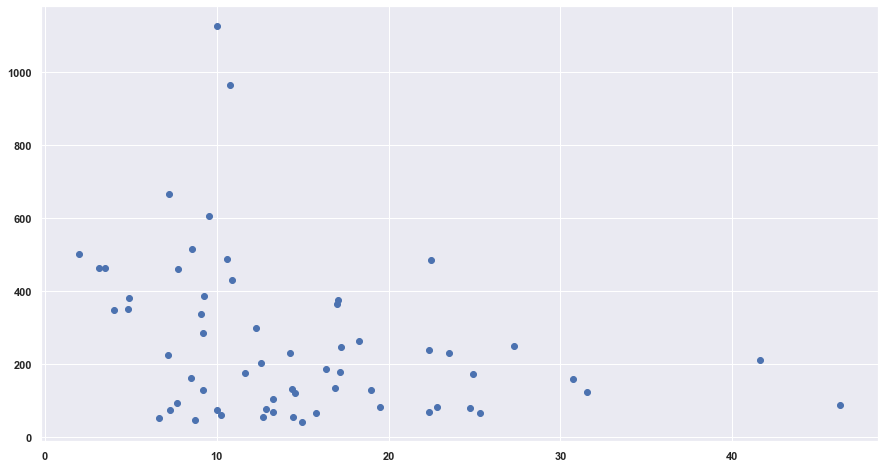

In [85]:
# Regression analysis of average daily cycles and average cycling lanes/tracks

# Independent variable is set as number of tracks.
X = cycle_tracks_year["Average Tracks or Lanes"]

# Dependent variable is set as Average Cyclists.
y = cycle_tracks_year["Average daily cycles"] 

# OLS model and summary.

# Scatter plot is created between both variables.
plt.scatter(X,y)

f = 'y ~ X'

# test is set as the OLS model of the data.
test = ols(f, data = cycle_tracks_year).fit()

# Prints the regression table.
test.summary()

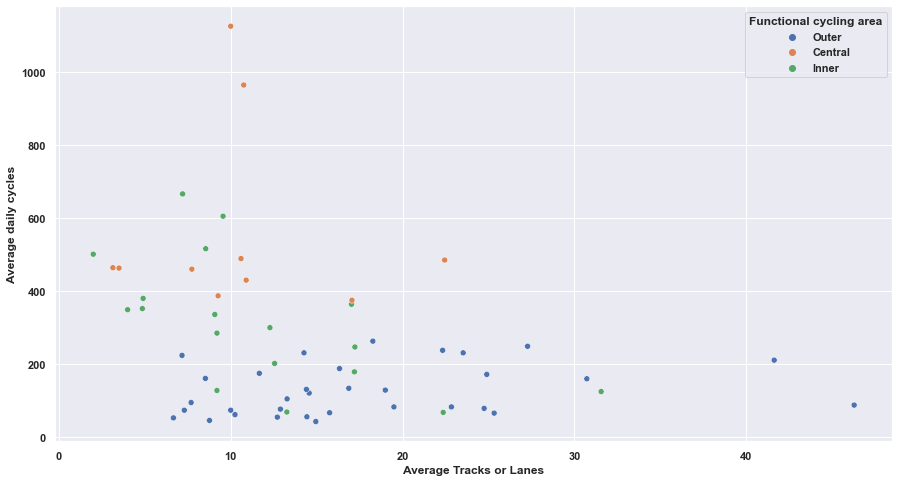

In [86]:
# Scatter plot showing highlighting points by London area.
sns.scatterplot(x='Average Tracks or Lanes', y='Average daily cycles', data=cycle_tracks_year, hue='Functional cycling area')
plt.savefig('AverageCyclistsVsTracksArea.png')

In [87]:
# Extract the estimated parameters.
print("Parameters: ", test.params)
    
# Extract the standard errors.
print("Standard errors: ", test.bse)    

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

Parameters:  Intercept    372.286977
X             -7.947532
dtype: float64
Standard errors:  Intercept    52.434867
X             3.056267
dtype: float64
Predicted values:  [170.94951075 290.82477875 266.73382364 257.56608681 271.23979021
 256.51077415 253.43525518 302.62920065 285.65888322 344.47061691
 286.78249975 292.81166164 175.58557084 314.26999691 221.28387742
 238.18815094   4.42980146 217.31011163 194.52718777 266.82934686
 304.3620742  356.39191428 236.93810629 333.68468119  41.41868903
 190.71644827 292.81166164 319.30343357 247.0692021  194.79210549
 185.28623438 296.35748342 315.06475006 333.32468847 340.49685112
 155.49597712 227.06390039 236.72042914 298.63985147 235.58943427
 272.50130316 257.79285062 304.52381344 121.46288078 299.1696869
 174.35559571 279.56577567 315.32966778 258.91777696 193.84597078
 288.04314269 269.82058814 311.12553876 274.66282087 300.14784464
 128.08100708 242.47729497 235.35763126 299.1696869  310.77526042
 347.30902105]


In [88]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = -5.512 * X + 335.415

# View the output.
y_pred

0     195.777667
1     278.917000
2     262.208750
3     255.850478
4     265.333857
         ...    
56    245.385667
57    240.447833
58    284.704600
59    292.753630
60    318.091571
Name: Average Tracks or Lanes, Length: 61, dtype: float64

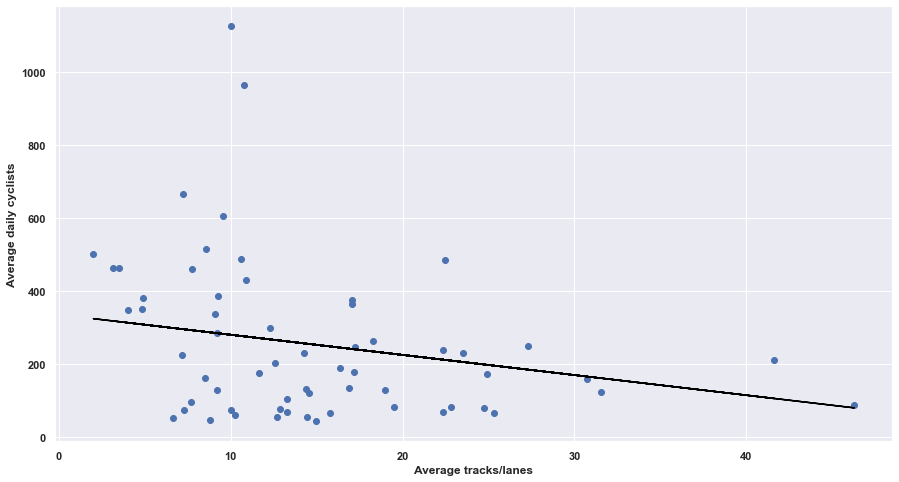

In [89]:
# Plot the graph with a regression line.
plt.scatter(X,y)

# Plot the line.
plt.plot(X,y_pred, color='black')
plt.xlabel("Average tracks/lanes")
plt.ylabel("Average daily cyclists")
plt.savefig('AverageCyclistsVsTracks.png')

### Linear regression of segregated cycle lanes vs daily cycles

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.708
Date:                Sat, 29 Oct 2022   Prob (F-statistic):              0.196
Time:                        20:42:17   Log-Likelihood:                -413.40
No. Observations:                  61   AIC:                             830.8
Df Residuals:                      59   BIC:                             835.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    202.2251     48.758      4.147      0.000     104.660     299.791
X             42.2680     32.340      1.307      0.196     -22.443     106.979
==============================================================================
Omnibus:                       26.917   Durbin-Watson:                   0.824
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.160
Skew:                           1.586   Prob(JB):                     2.58e-10
Kurtosis:                       5.703   Cond. No.                         3.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

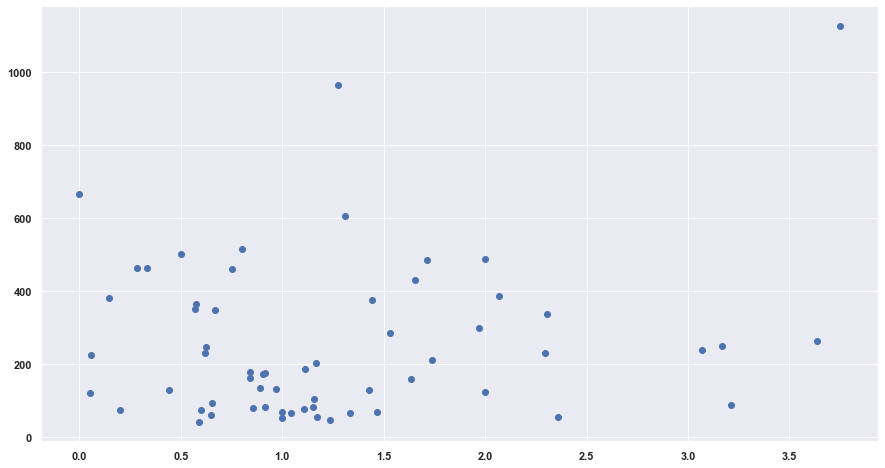

In [90]:
# Regression analysis of average daily cycles and segregated cycling lanes/tracks
# External research indicates  sgregated lanes are effectively used in other countries and 
# leads to more cyclists. 

# Independent variable is set as number of tracks.
X = cycle_tracks_year["Segregated Lane/Track"]

# Dependent variable is set as Average Cyclists.
y = cycle_tracks_year["Average daily cycles"] 

# OLS model and summary.

# Scatter plot is created between both variables.
plt.scatter(X,y)

f = 'y ~ X'

# test is set as the OLS model of the data.
test = ols(f, data = cycle_tracks_year).fit()

# Prints the regression table.
test.summary()

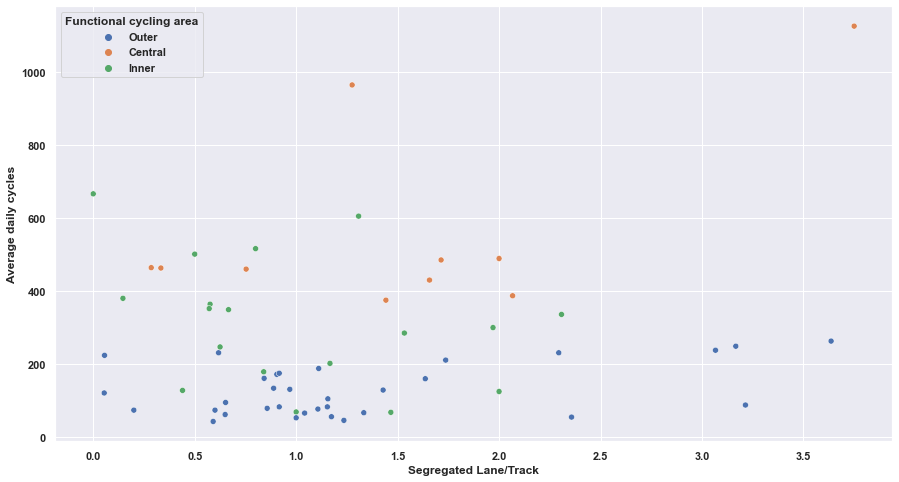

In [91]:
# Scatter plot showing highlighting points by London area.

sns.scatterplot(x='Segregated Lane/Track', y='Average daily cycles', data=cycle_tracks_year, hue='Functional cycling area')
plt.savefig('AverageCyclistsVsSegregatedTracksArea.png')

In [92]:
# Extract the estimated parameters.
print("Parameters: ", test.params)
    
# Extract the standard errors.
print("Standard errors: ", test.bse)    

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

Parameters:  Intercept    202.225114
X             42.268010
dtype: float64
Standard errors:  Intercept    48.758474
X            32.339514
dtype: float64
Predicted values:  [246.25429109 229.69932044 251.09750059 251.84408229 301.85685208
 204.50987114 227.2016653  254.43853816 272.26924497 216.31445056
 256.15326474 360.73015196 238.45483684 227.58591994 262.6079855
 239.79667843 338.08657508 240.97078982 264.21819541 244.493124
 236.03952197 223.35911892 226.5612409  226.3782625  275.6379736
 250.9958948  210.67871587 244.493124   258.58246072 331.84701168
 299.19290186 257.49866559 202.22511384 208.4106763  230.40378728
 336.0738127  355.92696899 263.18859004 289.57900151 237.73024238
 251.53779236 243.17224868 237.81922766 286.76113417 220.82303831
 240.46759922 240.97078982 204.57333662 228.331826   274.68455984
 286.76113417 249.02183938 229.79120742 285.49940252 299.76667576
 271.39094865 249.18956958 228.64262019 267.03606276 234.07087492
 214.30168817]


In [93]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = 42.268 * X + 202.225

# View the output.
y_pred

0     246.254167
1     229.699200
2     251.097375
3     251.843957
4     301.856714
         ...    
56    249.189444
57    228.642500
58    267.035933
59    234.070753
60    214.301571
Name: Segregated Lane/Track, Length: 61, dtype: float64

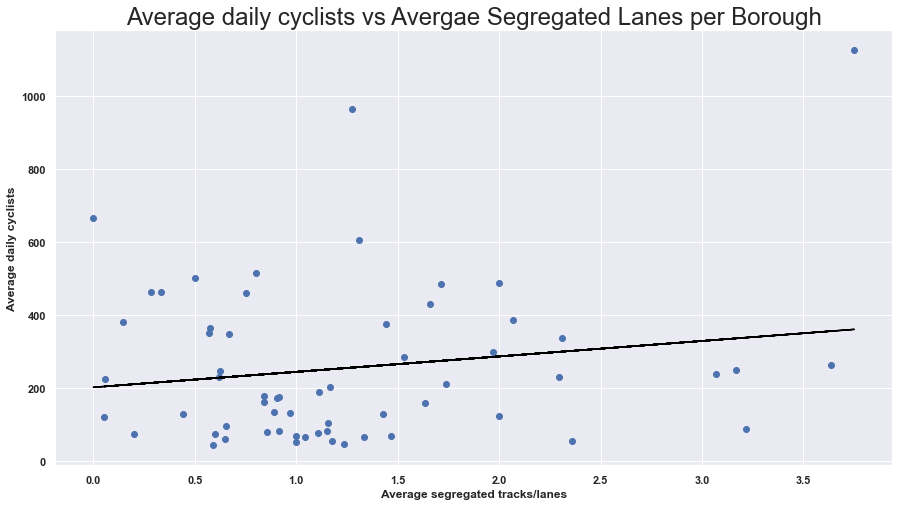

In [94]:
# Plot the graph with a regression line.
plt.scatter(X,y)

# Plot the line.

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.plot(X,y_pred, color='black')
plt.title("Average daily cyclists vs Avergae Segregated Lanes per Borough", size = 24)
plt.xlabel("Average segregated tracks/lanes", size = 12)
plt.ylabel("Average daily cyclists", size = 12)
plt.savefig('AverageCyclistsVsSegTracks.png')

### Correlations between areas of London daily cycles and average number of track type

In [95]:
# Correlations are calculated and filtered for Central London, only average daily cycle correlations are kept.
central_tracks = cycle_tracks_year[cycle_tracks_year['Functional cycling area'] == 'Central'] 

central_tracks_cor = central_tracks.corr()

central_tracks_cor = round(central_tracks_cor[['Average daily cycles']],2)

central_tracks_cor = central_tracks_cor.rename(columns = {'Average daily cycles' : 'Central daily cycles'})
central_tracks_cor = central_tracks_cor.reset_index()

In [96]:
# Correlations are calculated and filtered for Inner London, only average daily cycle correlations are kept.
inner_tracks = cycle_tracks_year[cycle_tracks_year['Functional cycling area'] == 'Inner'] 

inner_tracks_cor = inner_tracks.corr()

inner_tracks_cor = round(inner_tracks_cor[['Average daily cycles']],2)

inner_tracks_cor = inner_tracks_cor.rename(columns = {'Average daily cycles' : 'Inner daily cycles'})
inner_tracks_cor = inner_tracks_cor.reset_index()

In [97]:
# Correlations are calculated and filtered for Outer London, only average daily cycle correlations are kept.
outer_tracks = cycle_tracks_year[cycle_tracks_year['Functional cycling area'] == 'Outer'] 

outer_tracks_cor = outer_tracks.corr()

outer_tracks_cor = round(outer_tracks_cor[['Average daily cycles']],2)

outer_tracks_cor = outer_tracks_cor.rename(columns = {'Average daily cycles' : 'Outer daily cycles'})
outer_tracks_cor = outer_tracks_cor.reset_index()

In [98]:
# Renaming column to prepare to merge.
daily_cycles_cor = daily_cycles_cor.rename(columns = {'Average daily cycles' : 'Overall average daily cycles'})
daily_cycles_cor = daily_cycles_cor.reset_index()

In [99]:
# Correlations for average daily cycles in overall, Central, Inner and Outer London
correlation = pd.merge(daily_cycles_cor, central_tracks_cor, on=['index'])
correlation = pd.merge(correlation, inner_tracks_cor, on=['index'])
correlation = pd.merge(correlation, outer_tracks_cor, on=['index'])
correlation = correlation.rename(columns = {'index' : 'Track type'})

#View Dataframe 
correlation 

,Track type,Overall average daily cycles,Central daily cycles,Inner daily cycles,Outer daily cycles
0,On-Carriageway (if 1) or Off-Carriageway (if 0),-0.06,-0.02,-0.35,0.29
1,Segregated Lane/Track,0.17,0.56,-0.35,0.41
2,Stepped Lane/Track,-0.09,-0.37,-0.11,-0.09
3,Partially Segregated Lane/Track,-0.30,-0.28,-0.63,-0.04
4,Shared Lane or Footway,-0.33,-0.38,-0.56,0.25
5,Mandatory Cycle Lane,-0.09,-0.12,-0.49,0.13
6,Advisory Cycle Lane,-0.21,-0.08,-0.31,0.18
7,Cycle Lane/Track Priority,-0.20,-0.06,-0.32,0.21
8,Contraflow Lane/Track,0.36,0.48,-0.00,0.35
9,Bi-directional,-0.40,0.48,-0.68,0.14


In [100]:
# The amount of values per area is printed to give insight into sample size

area_count = cycle_tracks_year[['Functional cycling area']]
area_count['Count'] = 1
area_count = area_count.groupby(['Functional cycling area'], as_index=False).sum()

#View data 
area_count

C:\Users\jakee\AppData\Local\Temp/ipykernel_30780/3502826664.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_count['Count'] = 1


,Functional cycling area,Count
0,Central,10
1,Inner,18
2,Outer,33


### Average number of lanes or tracks surveyed per borough 

In [101]:
# The types of tracks/lanes are summed together.

tracks['Track type'] = 'Total'
tracks = tracks.drop(['Borough', 'Survey Date', 'Survey Year', 'Total Tracks or Lanes'], axis=1)
tracks = tracks.groupby(['Track type'], as_index=True).sum()

#View Data.
tracks

,On-Carriageway (if 1) or Off-Carriageway (if 0),Segregated Lane/Track,Stepped Lane/Track,Partially Segregated Lane/Track,Shared Lane or Footway,Mandatory Cycle Lane,Advisory Cycle Lane,Cycle Lane/Track Priority,Contraflow Lane/Track,Bi-directional,Cycle Bypass,Continuous Cycle Facilities at Bus Stop,Park Route,Waterside Route,Part-time (if 1) or Full-time (if 0)
Track type,,,,,,,,,,,,,,,
Total,13618,1901,104,3509,9674.0,1822.0,7159,2235.0,1486,9827,63,132,3769,518,2503


In [102]:
# Total data is prepared to be visulaised as a bar chart.
bar_tracks = tracks.transpose()
bar_tracks = bar_tracks.reset_index().sort_values(by='Total', ascending=False)
bar_tracks = bar_tracks.rename(columns = {'Track type' : 'index', 'index' : 'Track type'})
bar_tracks

Track type,Track type,Total
0,On-Carriageway (if 1) or Off-Carriageway (if 0),13618.0
9,Bi-directional,9827.0
4,Shared Lane or Footway,9674.0
6,Advisory Cycle Lane,7159.0
12,Park Route,3769.0
3,Partially Segregated Lane/Track,3509.0
14,Part-time (if 1) or Full-time (if 0),2503.0
7,Cycle Lane/Track Priority,2235.0
1,Segregated Lane/Track,1901.0
5,Mandatory Cycle Lane,1822.0


In [103]:
# Track types renamed for clarity purposes.
bar_tracks['Track type'][0] = 'On-Carriageway'
bar_tracks['Track type'][14] = 'Part-time'

C:\Users\jakee\AppData\Local\Temp/ipykernel_30780/2421850149.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_tracks['Track type'][0] = 'On-Carriageway'
C:\Users\jakee\AppData\Local\Temp/ipykernel_30780/2421850149.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_tracks['Track type'][14] = 'Part-time'


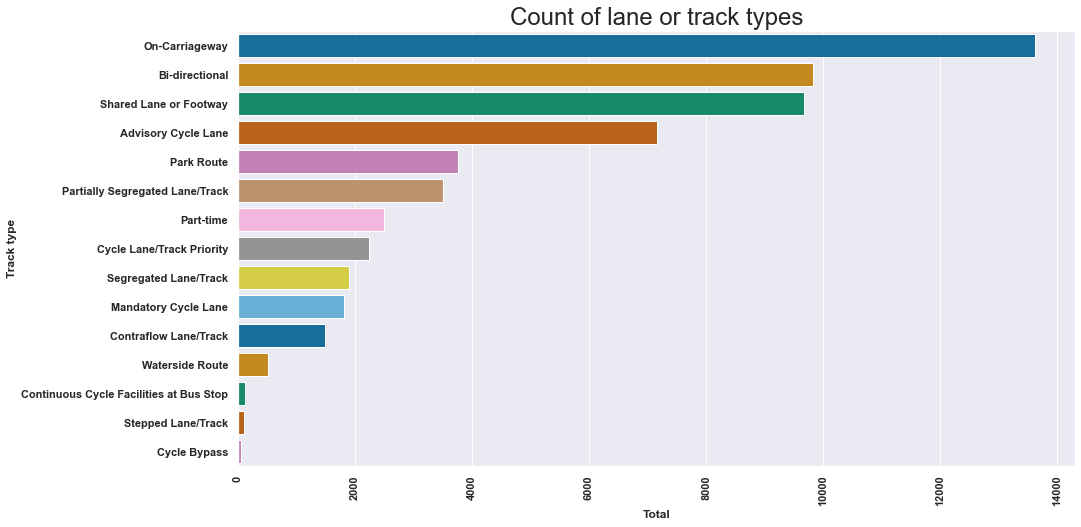

In [104]:
# The most common type of track surveyed is plotted as a bar chart.
sns.barplot(x='Total', y='Track type', data=bar_tracks, palette='colorblind', orient = 'h')
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.title('Count of lane or track types', size = 24)
plt.xticks(rotation=90)

plt.savefig('TrackTypeVolume.png', bbox_inches='tight', dpi=150)

In [105]:
bar_seg_lane = bar_tracks

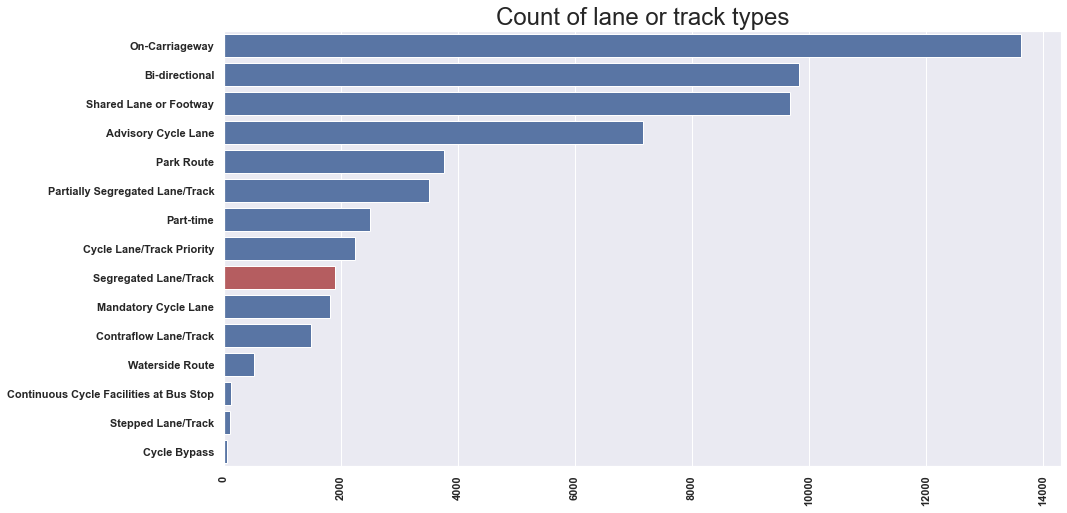

In [106]:
# The most common type of track surveyed is plotted as a bar chart, segregated lane total is highlight to emphasise 
# lack of use in London.
labels = np.array(bar_seg_lane['Track type'])
values = np.array(bar_seg_lane['Total'])
clrs = ['b' if y != 'Segregated Lane/Track' else 'r' for y in labels ]

sns.barplot(x=values, y=labels, palette = clrs, orient = 'h')
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.title('Count of lane or track types', size = 24)
plt.xticks(rotation=90)

plt.savefig('TrackTypeVolumeHighlight.png', bbox_inches='tight', dpi=150)

In [107]:
# The  correlations are filtered by most common type of lane/tracks used.
bar_tracks = bar_tracks[bar_tracks['Total'] > 7000]
most_freq_tracks_cor = pd.merge(bar_tracks, correlation, on=['Track type'])
  
#View data
most_freq_tracks_cor

,Track type,Total,Overall average daily cycles,Central daily cycles,Inner daily cycles,Outer daily cycles
0,Bi-directional,9827.0,-0.40,0.48,-0.68,0.14
1,Shared Lane or Footway,9674.0,-0.33,-0.38,-0.56,0.25
2,Advisory Cycle Lane,7159.0,-0.21,-0.08,-0.31,0.18


### Summary and Observations

When viewing the data, we only have the number of lanes survey per borough rather than amount per borough. This makes anything obtained through regression about number of lanes predicting number of cyclists innaccurate.

The types of lane data is more useful as this  is the average type spotted through each borough, however total amount would still be more useful. Our research found segrageted lanes are successful in other cities, meaning we try to explore this through regression. Despite there being a slight positive correlation (0.17), only 2.8% of cycling variance is explained by segregated lanes and the result is not statistically significant. More data samples should be collected and data is only avaliable for 2017 and 2018. However, it is unlikely segregated lanes will have a large impact on cycling. 

Correlations were collected by London area also, however no strong correlations are present and the data samples are then diluted further making it unreliable to make decisions from.

The average number of lanes/track types were put into a bar chart to see the most common, with on-carriageway, bi-drectional, shared lanes and advisory lanes being most common. Segregated lanes from this can be seen to be underutilised. 

## Parking vs Average Daily Cycling

In [108]:
# Import London cycle parking data.
parking = pd.read_csv('parking.csv')

print(parking.shape)

# There are 3 entries for 2019, meaning it is excluded to not skew results.
parking = parking[parking['Survey Year'] != 2019]

#View Dataframe.  
parking

(23758, 18)


,Survey Date,Survey Year,Borough,Carriageway,Covered,Secure,Locker,Sheffield Stand,"""M"" stand","""P"" stand",Cyclehoop,Post,Butterfly,Wheel Rack,Bike Hangar,Two Tier,Other,Capacity
0,16/10/2017,2017,Newham,0,0,0,0,0,0,0,0,0,0,0,1,0,0,6.0
1,12/06/2017,2017,Hackney,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2.0
2,15/08/2017,2017,Lambeth,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8.0
3,15/09/2017,2017,Havering,0,0,0,0,1,0,0,0,0,0,0,0,0,0,6.0
4,25/09/2017,2017,WalthamForest,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23753,29/06/2017,2017,CityofLondon,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4.0
23754,13/07/2017,2017,Hammersmith&Fulham,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2.0
23755,26/12/2017,2017,Ealing,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2.0
23756,27/12/2017,2017,Hounslow,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2.0


In [109]:
# Parking is grouped by borough, year and date by sum

parking_date = parking.groupby(['Borough', 'Survey Year', 'Survey Date']).agg('sum').reset_index()

#View Dataframe. 
parking_date

,Borough,Survey Year,Survey Date,Carriageway,Covered,Secure,Locker,Sheffield Stand,"""M"" stand","""P"" stand",Cyclehoop,Post,Butterfly,Wheel Rack,Bike Hangar,Two Tier,Other,Capacity
0,Barking&Dagenham,2017,03/11/2017,0,0,0,0,5,0,0,0,0,0,0,0,0,0,30.0
1,Barking&Dagenham,2017,05/11/2017,0,4,0,0,11,0,0,0,0,1,0,0,0,1,78.0
2,Barking&Dagenham,2017,07/11/2017,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4.0
3,Barking&Dagenham,2017,08/11/2017,0,0,0,0,2,0,0,0,0,0,0,0,0,0,16.0
4,Barking&Dagenham,2017,09/10/2017,0,0,0,0,3,0,0,2,0,0,0,0,0,0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233,Westminster,2017,30/06/2017,0,0,0,0,23,0,0,10,0,0,0,0,0,0,246.0
1234,Westminster,2017,30/08/2017,1,0,0,0,6,0,0,4,0,0,0,0,0,0,32.0
1235,Westminster,2017,31/05/2017,0,0,0,0,2,0,0,0,0,0,0,0,0,0,14.0
1236,Westminster,2017,31/08/2017,0,0,0,0,22,0,0,6,0,0,0,0,0,0,148.0


In [110]:
# Parking is grouped by borough and year by mean

parking_mean = parking_date.groupby(['Borough', 'Survey Year']).agg('mean').reset_index()

#View Dataframe. 
parking_mean

,Borough,Survey Year,Carriageway,Covered,Secure,Locker,Sheffield Stand,"""M"" stand","""P"" stand",Cyclehoop,Post,Butterfly,Wheel Rack,Bike Hangar,Two Tier,Other,Capacity
0,Barking&Dagenham,2017,0.000000,0.454545,0.045455,0.136364,9.454545,0.045455,0.000000,0.500000,0.000000,0.090909,0.136364,0.272727,0.000000,0.136364,72.909091
1,Barking&Dagenham,2018,0.000000,0.333333,0.000000,0.000000,2.222222,0.222222,0.000000,0.555556,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,24.777778
2,Barnet,2018,0.034483,1.275862,0.000000,0.000000,12.482759,0.137931,0.034483,0.034483,0.000000,0.172414,0.241379,0.448276,0.206897,0.379310,86.172414
3,Bexley,2017,0.045455,0.545455,0.000000,0.000000,6.863636,0.000000,0.090909,0.000000,0.000000,0.227273,0.045455,0.000000,0.000000,0.181818,48.363636
4,Bexley,2018,0.000000,0.500000,0.000000,0.000000,1.000000,0.333333,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.833333,19.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,WalthamForest,2017,4.476190,0.809524,0.380952,0.095238,3.666667,0.000000,0.285714,0.142857,0.000000,0.047619,0.666667,4.761905,0.285714,19.904762,174.904762
57,WalthamForest,2018,0.142857,0.285714,0.142857,0.142857,1.714286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285714,0.000000,1.285714,26.571429
58,Wandsworth,2017,0.108108,1.432432,0.540541,0.135135,16.432432,1.054054,0.027027,1.000000,0.108108,0.459459,0.243243,0.135135,0.000000,0.567568,130.243243
59,Wandsworth,2018,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,12.000000


In [111]:
# Some boroughs are missing spaces in the name, these are replaced by the correct values.
parking_mean['Borough'][0] = 'Barking & Dagenham'
parking_mean['Borough'][1] = 'Barking & Dagenham'

parking_mean['Borough'][10] = 'City of London'
parking_mean['Borough'][11] = 'City of London'

parking_mean['Borough'][22] = 'Hammersmith & Fulham'
parking_mean['Borough'][23] = 'Hammersmith & Fulham'

parking_mean['Borough'][34] = 'Kensington & Chelsea'
parking_mean['Borough'][35] = 'Kensington & Chelsea'

parking_mean['Borough'][36] = 'Kingston upon Thames'
parking_mean['Borough'][37] = 'Kingston upon Thames'

parking_mean['Borough'][48] = 'Richmond upon Thames'
parking_mean['Borough'][49] = 'Richmond upon Thames'

parking_mean['Borough'][54] = 'Tower Hamlets'
parking_mean['Borough'][55] = 'Tower Hamlets'

parking_mean['Borough'][56] = 'Waltham Forest'
parking_mean['Borough'][57] = 'Waltham Forest'

#View Dataframe. 
parking_mean

C:\Users\jakee\AppData\Local\Temp/ipykernel_30780/2576019587.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parking_mean['Borough'][0] = 'Barking & Dagenham'
C:\Users\jakee\AppData\Local\Temp/ipykernel_30780/2576019587.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parking_mean['Borough'][1] = 'Barking & Dagenham'
C:\Users\jakee\AppData\Local\Temp/ipykernel_30780/2576019587.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

,Borough,Survey Year,Carriageway,Covered,Secure,Locker,Sheffield Stand,"""M"" stand","""P"" stand",Cyclehoop,Post,Butterfly,Wheel Rack,Bike Hangar,Two Tier,Other,Capacity
0,Barking & Dagenham,2017,0.000000,0.454545,0.045455,0.136364,9.454545,0.045455,0.000000,0.500000,0.000000,0.090909,0.136364,0.272727,0.000000,0.136364,72.909091
1,Barking & Dagenham,2018,0.000000,0.333333,0.000000,0.000000,2.222222,0.222222,0.000000,0.555556,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,24.777778
2,Barnet,2018,0.034483,1.275862,0.000000,0.000000,12.482759,0.137931,0.034483,0.034483,0.000000,0.172414,0.241379,0.448276,0.206897,0.379310,86.172414
3,Bexley,2017,0.045455,0.545455,0.000000,0.000000,6.863636,0.000000,0.090909,0.000000,0.000000,0.227273,0.045455,0.000000,0.000000,0.181818,48.363636
4,Bexley,2018,0.000000,0.500000,0.000000,0.000000,1.000000,0.333333,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.833333,19.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Waltham Forest,2017,4.476190,0.809524,0.380952,0.095238,3.666667,0.000000,0.285714,0.142857,0.000000,0.047619,0.666667,4.761905,0.285714,19.904762,174.904762
57,Waltham Forest,2018,0.142857,0.285714,0.142857,0.142857,1.714286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285714,0.000000,1.285714,26.571429
58,Wandsworth,2017,0.108108,1.432432,0.540541,0.135135,16.432432,1.054054,0.027027,1.000000,0.108108,0.459459,0.243243,0.135135,0.000000,0.567568,130.243243
59,Wandsworth,2018,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,12.000000


In [112]:
# Parking is merged to the average daily cycles by borough and year data.
cycle_parking_year = pd.merge(parking_mean, borough_cycles, on=['Borough', 'Survey Year'])

#View Dataframe. 
cycle_parking_year

,Borough,Survey Year,Carriageway,Covered,Secure,Locker,Sheffield Stand,"""M"" stand","""P"" stand",Cyclehoop,Post,Butterfly,Wheel Rack,Bike Hangar,Two Tier,Other,Capacity,Functional cycling area,Average daily cycles
0,Barking & Dagenham,2017,0.000000,0.454545,0.045455,0.136364,9.454545,0.045455,0.000000,0.500000,0.000000,0.090909,0.136364,0.272727,0.000000,0.136364,72.909091,Outer,66.0
1,Barking & Dagenham,2018,0.000000,0.333333,0.000000,0.000000,2.222222,0.222222,0.000000,0.555556,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,24.777778,Outer,62.0
2,Barnet,2018,0.034483,1.275862,0.000000,0.000000,12.482759,0.137931,0.034483,0.034483,0.000000,0.172414,0.241379,0.448276,0.206897,0.379310,86.172414,Outer,105.0
3,Bexley,2017,0.045455,0.545455,0.000000,0.000000,6.863636,0.000000,0.090909,0.000000,0.000000,0.227273,0.045455,0.000000,0.000000,0.181818,48.363636,Outer,56.0
4,Bexley,2018,0.000000,0.500000,0.000000,0.000000,1.000000,0.333333,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.833333,19.333333,Outer,55.0
5,Brent,2018,0.060606,0.696970,0.181818,0.000000,10.272727,0.000000,2.060606,0.636364,0.000000,0.090909,0.060606,0.121212,0.000000,1.575758,88.181818,Outer,121.0
6,Bromley,2017,0.210526,1.631579,0.000000,0.105263,9.473684,0.263158,0.052632,0.210526,0.000000,0.315789,0.105263,0.684211,0.052632,0.842105,91.894737,Outer,43.0
7,Bromley,2018,0.076923,1.000000,0.000000,0.000000,4.615385,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.153846,0.000000,0.000000,34.076923,Outer,46.0
8,Camden,2017,0.760870,1.130435,0.326087,0.000000,14.500000,15.565217,0.021739,3.565217,0.043478,0.195652,0.195652,0.391304,0.195652,0.826087,195.500000,Central,430.0
9,Camden,2018,0.250000,0.000000,0.000000,0.000000,0.250000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.500000,Central,463.0


In [113]:
# The correlations are caluclated for eavery columnn.
cycle_parking_year = cycle_parking_year.drop(['Survey Year'], axis = 1)

cycle_parking_cor = cycle_parking_year.corr()

#View Dataframe. 
cycle_parking_cor

,Carriageway,Covered,Secure,Locker,Sheffield Stand,"""M"" stand","""P"" stand",Cyclehoop,Post,Butterfly,Wheel Rack,Bike Hangar,Two Tier,Other,Capacity,Average daily cycles
Carriageway,1.000000,0.249874,0.457828,0.439616,0.305620,0.072609,0.131327,0.311982,0.055844,0.040814,0.340524,0.978732,0.311866,0.645318,0.551720,0.134799
Covered,0.249874,1.000000,0.490269,0.305591,0.626158,0.081455,0.033262,0.105203,0.199979,0.286340,0.181222,0.319344,0.417449,0.092351,0.640404,-0.178631
Secure,0.457828,0.490269,1.000000,0.437565,0.399231,0.224444,0.151633,0.254867,0.533062,0.028600,0.172667,0.474361,0.141306,0.309106,0.536717,0.126219
Locker,0.439616,0.305591,0.437565,1.000000,0.338408,-0.033641,-0.003821,0.100487,0.141177,0.011813,0.121080,0.472623,0.067676,0.055162,0.430233,0.149425
Sheffield Stand,0.305620,0.626158,0.399231,0.338408,1.000000,0.061841,0.048886,0.331100,0.257707,0.159957,0.185664,0.351617,0.186859,-0.017718,0.853192,0.106832
"""M"" stand",0.072609,0.081455,0.224444,-0.033641,0.061841,1.000000,-0.019716,0.158394,0.156759,0.030342,0.041769,0.004937,0.158249,-0.003375,0.219681,0.110035
"""P"" stand",0.131327,0.033262,0.151633,-0.003821,0.048886,-0.019716,1.000000,0.028770,-0.010686,-0.002153,-0.014506,0.127721,0.017590,0.168578,0.105375,-0.063213
Cyclehoop,0.311982,0.105203,0.254867,0.100487,0.331100,0.158394,0.028770,1.000000,0.325333,0.043692,-0.050007,0.265704,0.046387,-0.020369,0.429935,0.263277
Post,0.055844,0.199979,0.533062,0.141177,0.257707,0.156759,-0.010686,0.325333,1.000000,0.053513,0.049932,0.039118,-0.059271,-0.031859,0.308714,0.224697
Butterfly,0.040814,0.286340,0.028600,0.011813,0.159957,0.030342,-0.002153,0.043692,0.053513,1.000000,0.221457,0.041791,-0.049658,-0.019957,0.147186,0.075776


In [114]:
# All correlations are dropped other than with Average Daily Cycles, results are round to 2 decimal places

daily_cycles_cor = round(cycle_parking_cor[['Average daily cycles']],2)

#View Dataframe. 
daily_cycles_cor

,Average daily cycles
Carriageway,0.13
Covered,-0.18
Secure,0.13
Locker,0.15
Sheffield Stand,0.11
"""M"" stand",0.11
"""P"" stand",-0.06
Cyclehoop,0.26
Post,0.22
Butterfly,0.08


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     2.667
Date:                Sat, 29 Oct 2022   Prob (F-statistic):              0.108
Time:                        20:42:20   Log-Likelihood:                -406.15
No. Observations:                  60   AIC:                             816.3
Df Residuals:                      58   BIC:                             820.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    191.6722     45.777      4.187      0.000     100.039     283.306
X              0.6770      0.415      1.633      0.108      -0.153       1.507
==============================================================================
Omnibus:                       39.670   Durbin-Watson:                   1.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.957
Skew:                           2.041   Prob(JB):                     9.81e-24
Kurtosis:                       8.072   Cond. No.                         183.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

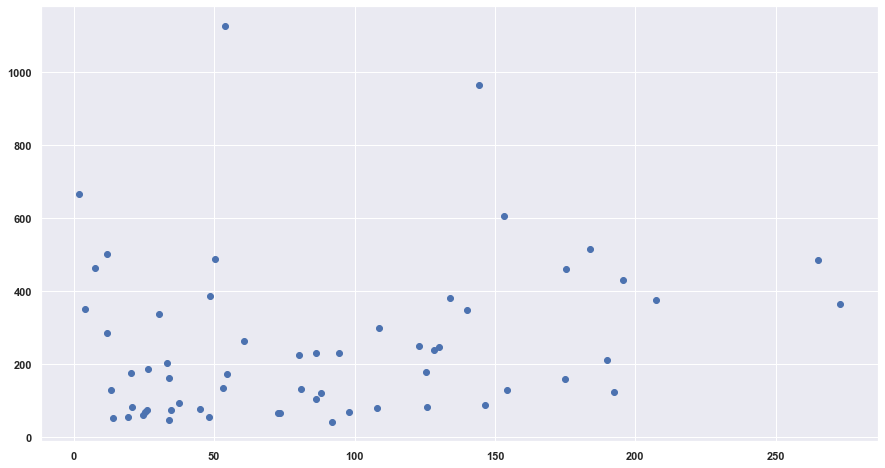

In [115]:
# Regression analysis of average daily cycles and average cycle parking capacity.
# Independent variable is set as number of tracks.
X = cycle_parking_year["Capacity"]

# Dependent variable is set as Total Cyclists.
y = cycle_parking_year["Average daily cycles"] 

# OLS model and summary.

# Scatter plot is created between both variables.
plt.scatter(X,y)

f = 'y ~ X'

# test is set as the OLS model of the data.
test = ols(f, data = cycle_parking_year).fit()

# Prints the regression table.
test.summary()

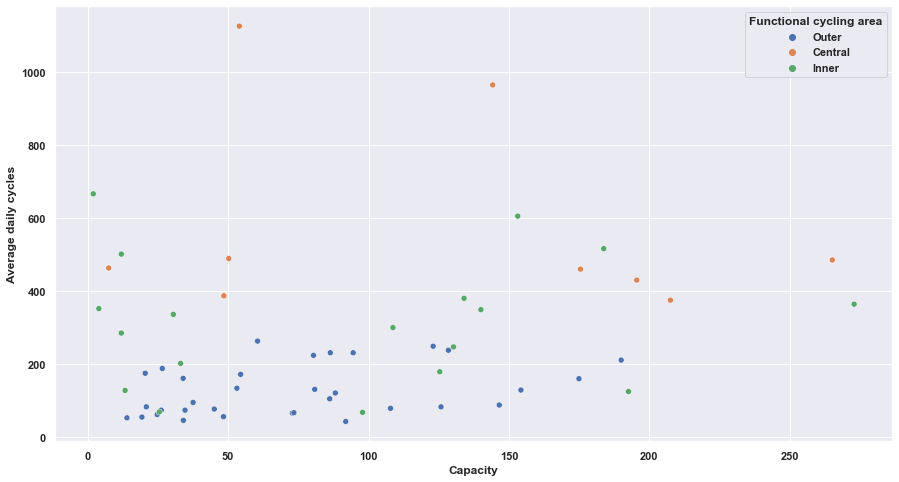

In [116]:
# Scatter plot showing highlighting points by London area.
sns.scatterplot(x='Capacity', y='Average daily cycles', data=cycle_parking_year, hue='Functional cycling area')
plt.savefig('AverageCyclistsVsParkingArea.png')

In [117]:
# Extract the estimated parameters.
print("Parameters: ", test.params)
    
# Extract the standard errors.
print("Standard errors: ", test.bse)    

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

Parameters:  Intercept    191.672186
X              0.677031
dtype: float64
Standard errors:  Intercept    45.777394
X             0.414604
dtype: float64
Predicted values:  [241.03389937 208.44750932 250.01357985 224.41586625 204.76145176
 251.37400887 253.88776982 214.74331876 324.03174258 196.74991851
 289.30005335 228.23185904 264.68320695 209.41039782 296.10421469
 227.64775388 290.88326425 205.81461107 257.93659324 208.93647614
 316.0639974  199.79655792 376.42039973 194.38031009 320.26824684
 276.84268333 215.14259344 201.15061988 241.39164869 278.62835254
 250.15476693 295.34623435 193.02624813 282.39433736 286.45652324
 274.94699659 232.6325604  332.13918855 224.50818865 276.5447897
 214.08191158 246.40911502 214.69123946 322.03142377 200.69926589
 228.55255792 205.55132124 246.11163171 255.66515431 371.14181487
 225.69299287 222.19274271 217.09162202 265.26201106 212.32163103
 310.08812836 209.66186647 279.85089666 199.79655792 310.46337582]


In [118]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = 0.677* X + 191.672

# View the output.
y_pred

0     241.031455
1     208.446556
2     250.010724
3     224.414182
4     204.760667
5     251.371091
6     253.884737
7     214.742077
8     324.025500
9     196.749500
10    289.295400
11    228.230000
12    264.679680
13    209.409400
14    296.099250
15    227.645922
16    290.878538
17    205.813778
18    257.933375
19    208.935500
20    316.058119
21    199.796000
22    376.411760
23    194.380000
24    320.262176
25    276.838600
26    215.141333
27    201.150000
28    241.389187
29    278.624188
30    250.151905
31    295.341304
32    193.026000
33    282.390000
34    286.452000
35    274.943000
36    232.630500
37    332.132575
38    224.506500
39    276.540720
40    214.080700
41    246.406424
42    214.690000
43    322.025273
44    200.698667
45    228.550684
46    205.550500
47    246.108955
48    255.662040
49    371.133417
50    225.691250
51    222.191160
52    217.090273
53    265.258458
54    212.320500
55    310.082524
56    209.660857
57    279.846676
58    199.7960

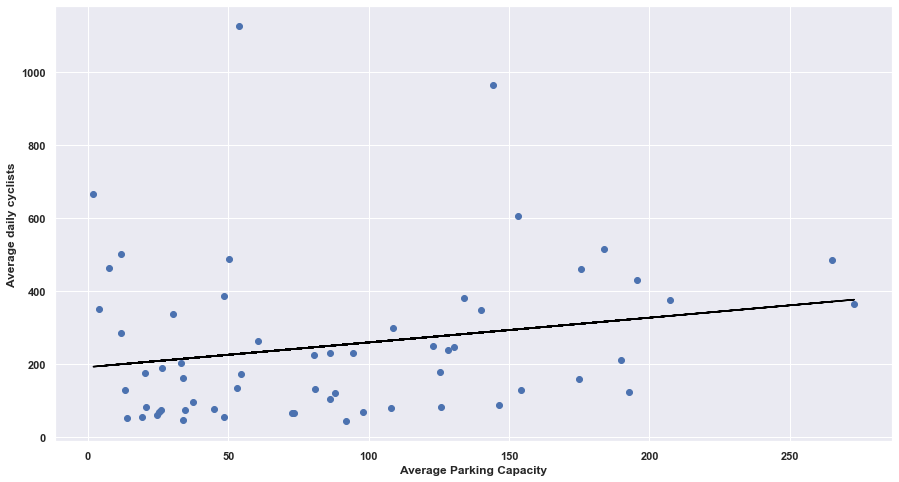

In [119]:
# Plot the graph with a regression line.

plt.scatter(X,y)

# Plot the line.
plt.plot(X,y_pred, color='black')
plt.xlabel("Average Parking Capacity")
plt.ylabel("Average daily cyclists")
plt.savefig('AverageCyclistsVsAverageParking.png')

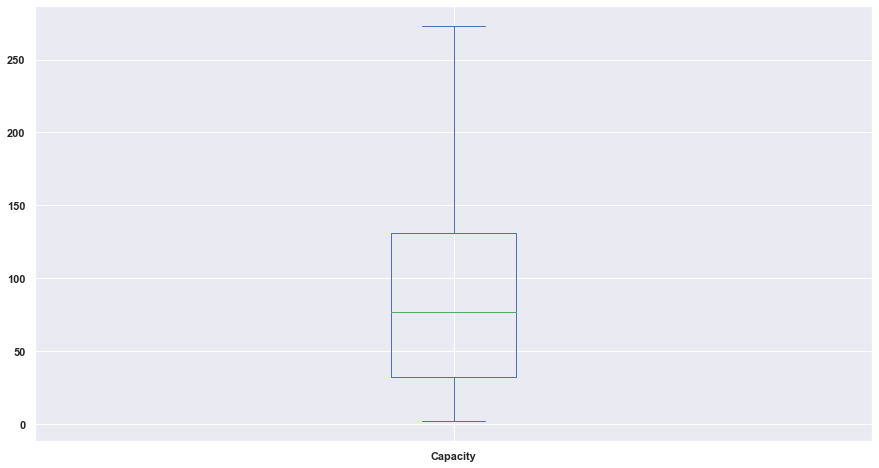

In [120]:
# Box plot is created to observe outliers in parking capacity, none are found.
capacity = cycle_parking_year.reset_index()['Capacity'].sort_values()
capacity.plot(kind='box')
plt.savefig('parking_capacity_boxplot.png')

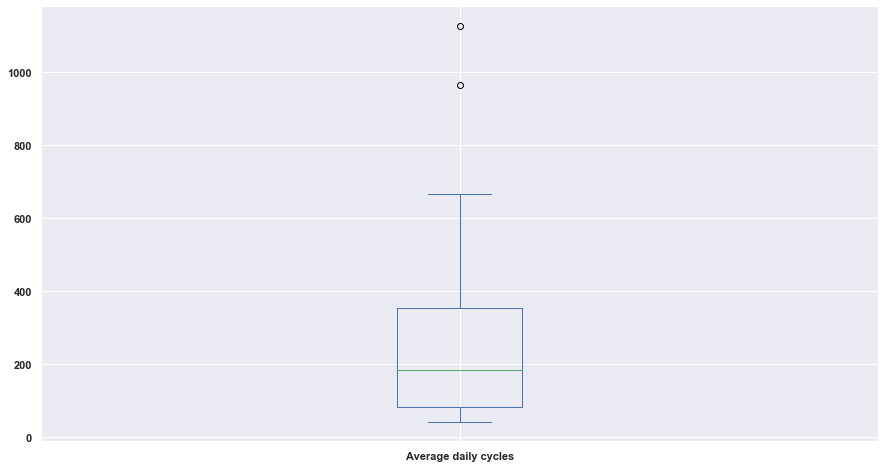

In [121]:
# Box plot is created to observe outliers in parking capacity, two are found
# for City of London.
avg_cycles = cycle_parking_year.reset_index()['Average daily cycles'].sort_values()
avg_cycles.plot(kind='box')
plt.savefig('avg_cycles_boxplot.png')

In [122]:
# Data filters out City of London as they are outliers. 
cycle_parking_year = cycle_parking_year[cycle_parking_year['Borough'] != 'City of London']
cycle_parking_year

,Borough,Carriageway,Covered,Secure,Locker,Sheffield Stand,"""M"" stand","""P"" stand",Cyclehoop,Post,Butterfly,Wheel Rack,Bike Hangar,Two Tier,Other,Capacity,Functional cycling area,Average daily cycles
0,Barking & Dagenham,0.000000,0.454545,0.045455,0.136364,9.454545,0.045455,0.000000,0.500000,0.000000,0.090909,0.136364,0.272727,0.000000,0.136364,72.909091,Outer,66.0
1,Barking & Dagenham,0.000000,0.333333,0.000000,0.000000,2.222222,0.222222,0.000000,0.555556,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,24.777778,Outer,62.0
2,Barnet,0.034483,1.275862,0.000000,0.000000,12.482759,0.137931,0.034483,0.034483,0.000000,0.172414,0.241379,0.448276,0.206897,0.379310,86.172414,Outer,105.0
3,Bexley,0.045455,0.545455,0.000000,0.000000,6.863636,0.000000,0.090909,0.000000,0.000000,0.227273,0.045455,0.000000,0.000000,0.181818,48.363636,Outer,56.0
4,Bexley,0.000000,0.500000,0.000000,0.000000,1.000000,0.333333,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.833333,19.333333,Outer,55.0
5,Brent,0.060606,0.696970,0.181818,0.000000,10.272727,0.000000,2.060606,0.636364,0.000000,0.090909,0.060606,0.121212,0.000000,1.575758,88.181818,Outer,121.0
6,Bromley,0.210526,1.631579,0.000000,0.105263,9.473684,0.263158,0.052632,0.210526,0.000000,0.315789,0.105263,0.684211,0.052632,0.842105,91.894737,Outer,43.0
7,Bromley,0.076923,1.000000,0.000000,0.000000,4.615385,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.153846,0.000000,0.000000,34.076923,Outer,46.0
8,Camden,0.760870,1.130435,0.326087,0.000000,14.500000,15.565217,0.021739,3.565217,0.043478,0.195652,0.195652,0.391304,0.195652,0.826087,195.500000,Central,430.0
9,Camden,0.250000,0.000000,0.000000,0.000000,0.250000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.500000,Central,463.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     4.518
Date:                Sat, 29 Oct 2022   Prob (F-statistic):             0.0380
Time:                        20:42:22   Log-Likelihood:                -374.13
No. Observations:                  58   AIC:                             752.3
Df Residuals:                      56   BIC:                             756.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    167.2686     33.590      4.980      0.000      99.979     234.558
X              0.6463      0.304      2.125      0.038       0.037       1.255
==============================================================================
Omnibus:                       12.055   Durbin-Watson:                   1.071
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.472
Skew:                           1.085   Prob(JB):                      0.00196
Kurtosis:                       3.671   Cond. No.                         181.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

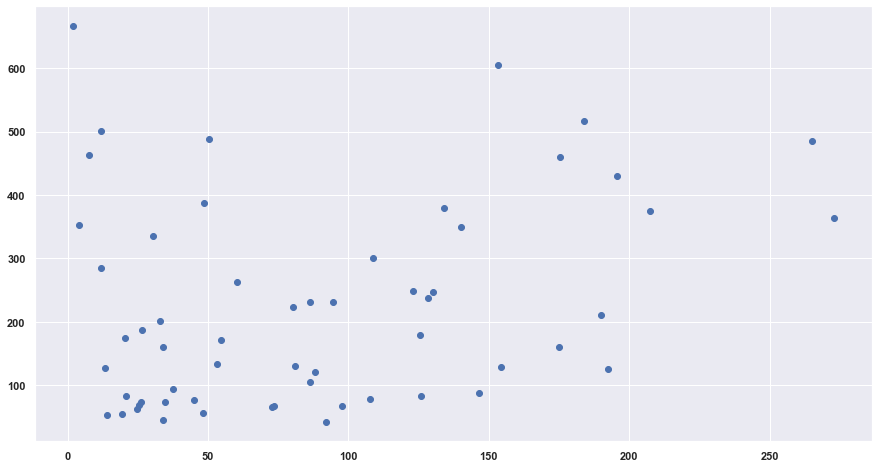

In [123]:
# Regression analysis of average daily cycles and parking capacity without outliers is calculated
# Independent variable is set as number of parking.
X = cycle_parking_year["Capacity"]

# Dependent variable is set as Total Cyclists.
y = cycle_parking_year["Average daily cycles"] 

# OLS model and summary.

# Scatter plot is created between both variables
plt.scatter(X,y)

f = 'y ~ X'

# test is set as the OLS model of the data
test = ols(f, data = cycle_parking_year).fit()

# Prints the regression table
test.summary()

In [124]:
# Extract the estimated parameters.
print("Parameters: ", test.params)
    
# Extract the standard errors.
print("Standard errors: ", test.bse)    

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

Parameters:  Intercept    167.268584
X              0.646312
dtype: float64
Standard errors:  Intercept    33.590397
X             0.304083
dtype: float64
Predicted values:  [214.39061429 183.28276264 222.9628608  198.52658921 179.76395214
 224.26156323 226.66126761 189.29291307 293.62260623 172.11592523
 236.96688466 184.20196212 266.96223075 201.61183679 261.97816988
 180.76932657 230.52638425 183.74954363 286.01638061 175.02432983
 343.63423909 169.85383277 290.02987114 248.57465056 189.67407151
 176.3169541  214.7321315  250.27929882 223.09764182 266.23864216
 168.5612085  253.87441006 257.75228285 246.76497659 206.37046828
 301.36219403 198.61472268 248.29027323 188.66151584 219.52194093
 189.24319676 291.71304766 175.88607934 202.47558727 180.51798296
 219.23795529 228.35800704 338.59515882 199.74576892 196.40433519
 191.53466705 237.51942676 186.98110429 280.31165397 184.44202091
 251.44637258 175.02432983 280.66987537]


In [125]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = 0.646* X + 167.268

# View the output.
y_pred

0     214.367273
1     183.274444
2     222.935379
3     198.510909
4     179.757333
5     224.233455
6     226.632000
7     189.281692
8     293.561000
9     172.113000
12    236.932640
13    184.193200
14    266.913500
15    201.594667
16    261.931846
17    180.762222
18    230.495250
19    183.741000
20    285.958448
21    175.020000
22    343.548480
23    169.852000
24    289.970000
25    248.534800
26    189.662667
27    176.312000
28    214.708625
29    250.238625
30    223.070095
31    266.190261
32    168.560000
33    253.832000
34    257.708000
35    246.726000
36    206.351000
37    301.296850
38    198.599000
39    248.250560
40    188.650600
41    219.496121
42    189.232000
43    291.652364
44    175.881333
45    202.458000
46    180.511000
47    219.212273
48    228.327920
49    338.511833
50    199.729500
51    196.389680
52    191.522364
53    237.484915
54    186.971000
55    280.256476
56    184.433143
57    251.405135
58    175.020000
59    280.614525
Name: Capacity

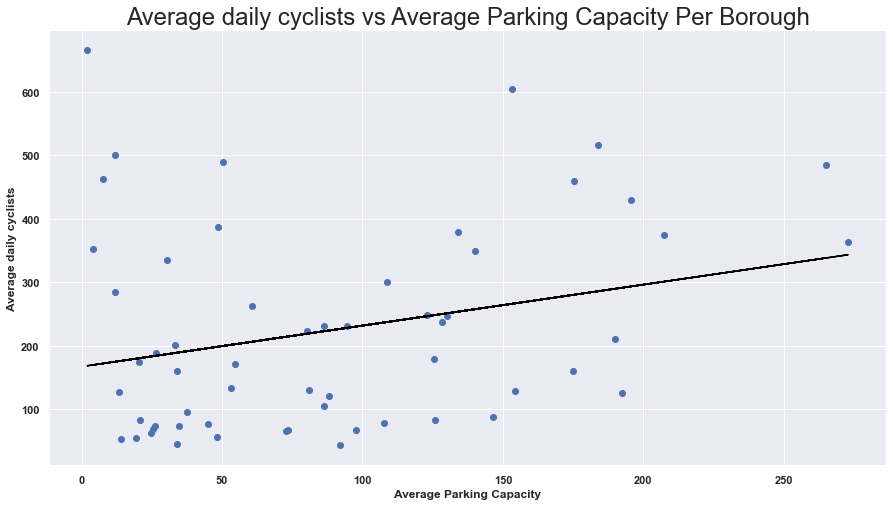

In [126]:
# Plot the graph with a regression line.

plt.scatter(X,y)

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"


# Plot the line.
plt.plot(X,y_pred, color='black')
plt.title("Average daily cyclists vs Average Parking Capacity Per Borough", size = 24)
plt.xlabel("Average Parking Capacity", size = 12)
plt.ylabel("Average daily cyclists", size = 12)
plt.savefig('AverageCyclistsVsAverageParkingNoOutlier.png')

In [127]:
# Correlations are recalculated without outliers.
cycle_parking_corr = cycle_parking_year.corr()
daily_cycles_cor = round(cycle_parking_corr[['Average daily cycles']],2)
daily_cycles_cor

,Average daily cycles
Carriageway,0.25
Covered,-0.10
Secure,0.29
Locker,0.25
Sheffield Stand,0.19
"""M"" stand",0.18
"""P"" stand",-0.05
Cyclehoop,0.42
Post,0.37
Butterfly,0.21


In [128]:
# Correlations are calculated and filtered for Central London, only average daily cycle correlations are kept.
central_parking = cycle_parking_year[cycle_parking_year['Functional cycling area'] == 'Central'] 

central_parking_cor = central_parking.corr()

central_parking_cor = round(central_parking_cor[['Average daily cycles']],2)

central_parking_cor = central_parking_cor.rename(columns = {'Average daily cycles' : 'Central daily cycles'})
central_parking_cor = central_parking_cor.reset_index()

In [129]:
# Correlations are calculated and filtered for Inner London, only average daily cycle correlations are kept.
inner_parking = cycle_parking_year[cycle_parking_year['Functional cycling area'] == 'Inner'] 

inner_parking_cor = inner_parking.corr()

inner_parking_cor = round(inner_parking_cor[['Average daily cycles']],2)

inner_parking_cor = inner_parking_cor.rename(columns = {'Average daily cycles' : 'Inner daily cycles'})
inner_parking_cor = inner_parking_cor.reset_index()

In [130]:
# Correlations are calculated and filtered for Outer London, only average daily cycle correlations are kept.
outer_parking = cycle_parking_year[cycle_parking_year['Functional cycling area'] == 'Outer'] 

outer_parking_cor = outer_parking.corr()

outer_parking_cor = round(outer_parking_cor[['Average daily cycles']],2)

outer_parking_cor = outer_parking_cor.rename(columns = {'Average daily cycles' : 'Outer daily cycles'})
outer_parking_cor = outer_parking_cor.reset_index()

In [131]:
# Renaming column to prepare to merge.
daily_cycles_cor = daily_cycles_cor.rename(columns = {'Average daily cycles' : 'Overall average daily cycles'})
daily_cycles_cor = daily_cycles_cor.reset_index()

In [132]:
# Correlations for average daily cycles in overall, Central, Inner and Outer London.
correlation = pd.merge(daily_cycles_cor, central_parking_cor, on=['index'])
correlation = pd.merge(correlation, inner_parking_cor, on=['index'])
correlation = pd.merge(correlation, outer_parking_cor, on=['index'])
correlation = correlation.rename(columns = {'index' : 'Parking type'})
correlation 

,Parking type,Overall average daily cycles,Central daily cycles,Inner daily cycles,Outer daily cycles
0,Carriageway,0.25,-0.42,0.24,0.19
1,Covered,-0.10,-0.27,-0.29,0.16
2,Secure,0.29,-0.30,0.15,0.34
3,Locker,0.25,0.41,0.25,-0.02
4,Sheffield Stand,0.19,0.01,0.08,0.26
5,"""M"" stand",0.18,-0.11,-0.11,-0.24
6,"""P"" stand",-0.05,-0.44,-0.21,-0.01
7,Cyclehoop,0.42,-0.24,0.36,0.29
8,Post,0.37,0.21,0.29,0.27
9,Butterfly,0.21,0.19,0.30,-0.12


In [133]:
# The amount of values per area is printed to give insight into sample size.
area_count = cycle_parking_year[['Functional cycling area']]
area_count['Count'] = 1
area_count = area_count.groupby(['Functional cycling area'], as_index=False).sum()
area_count

C:\Users\jakee\AppData\Local\Temp/ipykernel_30780/989830874.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_count['Count'] = 1


,Functional cycling area,Count
0,Central,7
1,Inner,18
2,Outer,33


C:\Users\jakee\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.198
Method:                 Least Squares   F-statistic:                  0.009249
Date:                Sat, 29 Oct 2022   Prob (F-statistic):              0.927
Time:                        20:42:23   Log-Likelihood:                -36.126
No. Observations:                   7   AIC:                             76.25
Df Residuals:                       5   BIC:                             76.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    443.9808     33.781     13.143      0.000     357.143     530.819
X             -0.0199      0.207     -0.096      0.927      -0.551       0.511
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.539
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.760
Skew:                          -0.454   Prob(JB):                        0.684
Kurtosis:                       1.666   Cond. No.                         293.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

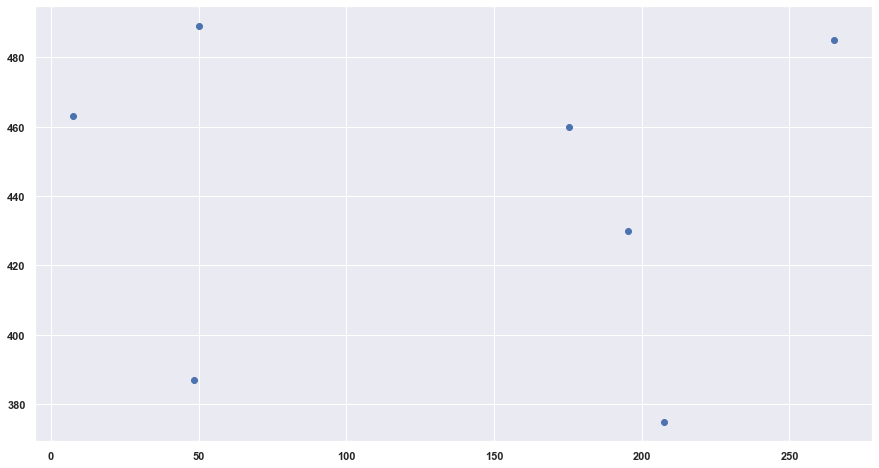

In [134]:
# Regression analysis of average daily cycles and average cycling parking
# for Central London.
# Independent variable is set as number of tracks.
X = central_parking["Capacity"]

# Dependent variable is set as Average Cyclists.
y = central_parking["Average daily cycles"] 

# OLS model and summary.

# Scatter plot is created between both variables
plt.scatter(X,y)

f = 'y ~ X'

# test is set as the OLS model of the data
test = ols(f, data = central_parking).fit()

# Prints the regression table
test.summary()

C:\Users\jakee\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.060
Method:                 Least Squares   F-statistic:                   0.03158
Date:                Sat, 29 Oct 2022   Prob (F-statistic):              0.861
Time:                        20:42:23   Log-Likelihood:                -117.99
No. Observations:                  18   AIC:                             240.0
Df Residuals:                      16   BIC:                             241.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    306.0753     66.275      4.618      0.000     165.579     446.571
X              0.0973      0.548      0.178      0.861      -1.064       1.258
==============================================================================
Omnibus:                        0.841   Durbin-Watson:                   0.855
Prob(Omnibus):                  0.657   Jarque-Bera (JB):                0.792
Skew:                           0.420   Prob(JB):                        0.673
Kurtosis:                       2.409   Cond. No.                         189.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

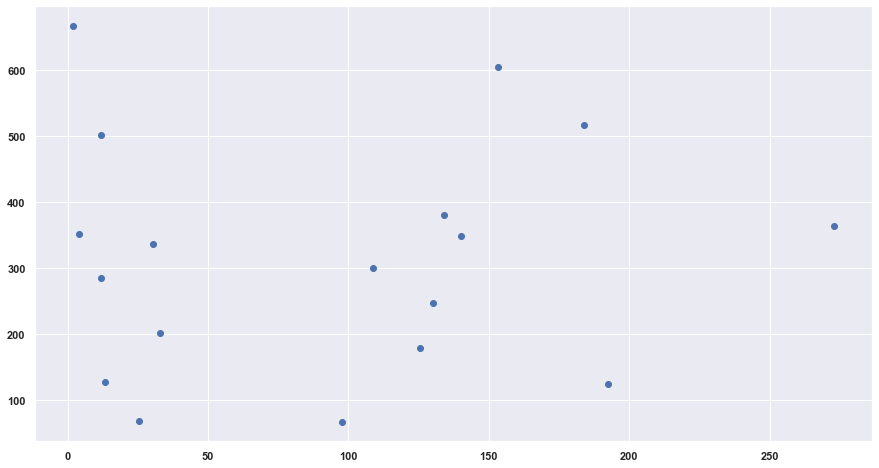

In [135]:
# Regression analysis of average daily cycles and average cycling parking
# for Inner London.
# Independent variable is set as number of tracks.
X = inner_parking["Capacity"]

# Dependent variable is set as Average Cyclists.
y = inner_parking["Average daily cycles"] 

# OLS model and summary.

# Scatter plot is created between both variables
plt.scatter(X,y)

f = 'y ~ X'

# test is set as the OLS model of the data
test = ols(f, data = inner_parking).fit()

# Prints the regression table
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     4.397
Date:                Sat, 29 Oct 2022   Prob (F-statistic):             0.0443
Time:                        20:42:24   Log-Likelihood:                -183.85
No. Observations:                  33   AIC:                             371.7
Df Residuals:                      31   BIC:                             374.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     90.2143     21.334      4.229      0.000      46.703     133.725
X              0.5070      0.242      2.097      0.044       0.014       1.000
==============================================================================
Omnibus:                        4.618   Durbin-Watson:                   0.854
Prob(Omnibus):                  0.099   Jarque-Bera (JB):                3.105
Skew:                           0.581   Prob(JB):                        0.212
Kurtosis:                       2.048   Cond. No.                         165.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

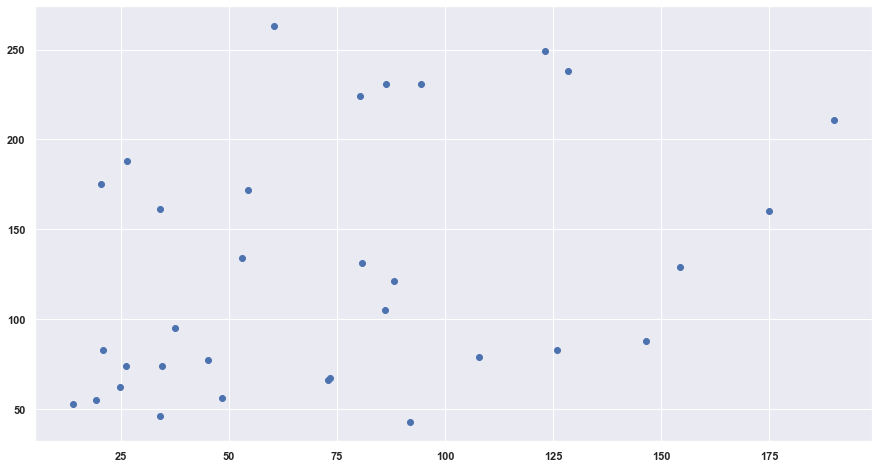

In [136]:
# Regression analysis of average daily cycles and average cycling parking
# for Outer London.
# Independent variable is set as number of tracks.
X = outer_parking["Capacity"]

# Dependent variable is set as Average Cyclists.
y = outer_parking["Average daily cycles"] 

# OLS model and summary.

# Scatter plot is created between both variables
plt.scatter(X,y)

f = 'y ~ X'

# test is set as the OLS model of the data
test = ols(f, data = outer_parking).fit()

# Prints the regression table
test.summary()

In [137]:
# The types of tracks/lanes are summed together.
parking['Parking type'] ='Total'

parking = parking.drop(['Borough', 'Survey Date', 'Survey Year', 'Capacity'], axis=1)
parking = parking.groupby(['Parking type'], as_index=True).sum()

#View Dataframe. 
parking

,Carriageway,Covered,Secure,Locker,Sheffield Stand,"""M"" stand","""P"" stand",Cyclehoop,Post,Butterfly,Wheel Rack,Bike Hangar,Two Tier,Other
Parking type,,,,,,,,,,,,,,
Total,772,1198,198,257,17544,844,118,2448,25,223,164,924,100,1177


In [138]:
# Total data is prepared to be visulaised as a bar chart

bar_parking = parking.transpose()
bar_parking = bar_parking.reset_index().sort_values(by='Total', ascending=False)
bar_parking = bar_parking.rename(columns = {'Parking type' : 'index', 'index' : 'Parking type'})

#View Dataframe. 
bar_parking

Parking type,Parking type,Total
4,Sheffield Stand,17544
7,Cyclehoop,2448
1,Covered,1198
13,Other,1177
11,Bike Hangar,924
5,"""M"" stand",844
0,Carriageway,772
3,Locker,257
9,Butterfly,223
2,Secure,198


In [139]:
# Print percentage of sheffield stands used in observed parking type findings

shef_stand_total = (17544 / sum(bar_parking['Total'])) * 100


print(round(shef_stand_total,2))

67.5


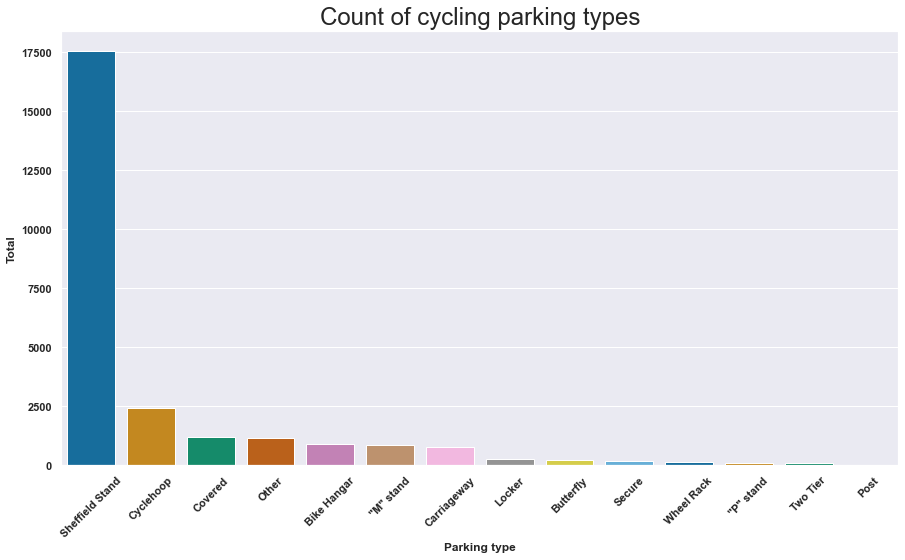

In [140]:
# The most common type of parking surveyed is plotted as a bar chart.
sns.barplot(x='Parking type', y='Total', data=bar_parking, palette='colorblind')
plt.title('Count of cycling parking types', size = 24)
plt.xticks(rotation=45)
plt.savefig('ParkingTypeVolume.png', bbox_inches='tight', dpi=150)

In [141]:
# The correlations are filtered by most common type of parking used.
bar_parking = bar_parking[bar_parking['Total'] > 500]
most_freq_parking_cor = pd.merge(bar_parking, correlation, on=['Parking type'])
 
#View Dataframe. 
most_freq_parking_cor

,Parking type,Total,Overall average daily cycles,Central daily cycles,Inner daily cycles,Outer daily cycles
0,Sheffield Stand,17544,0.19,0.01,0.08,0.26
1,Cyclehoop,2448,0.42,-0.24,0.36,0.29
2,Covered,1198,-0.10,-0.27,-0.29,0.16
3,Other,1177,-0.04,-0.22,0.12,0.13
4,Bike Hangar,924,0.20,-0.37,0.13,0.22
5,"""M"" stand",844,0.18,-0.11,-0.11,-0.24
6,Carriageway,772,0.25,-0.42,0.24,0.19


In [142]:
# Average parking capacity is calcualted per borough

borough_parking = cycle_parking_year[['Borough', 'Capacity']]
borough_parking = borough_parking.groupby(['Borough'], as_index=False).mean().round()
borough_parking = borough_parking.reset_index().sort_values(by='Capacity', ascending=False)

#View Dataframe. 
borough_parking

,index,Borough,Capacity
12,12,Haringey,190.0
30,30,Westminster,175.0
25,25,Southwark,158.0
11,11,Hammersmith & Fulham,138.0
17,17,Kensington & Chelsea,137.0
19,19,Lambeth,128.0
15,15,Hounslow,107.0
7,7,Ealing,104.0
22,22,Newham,103.0
5,5,Camden,102.0


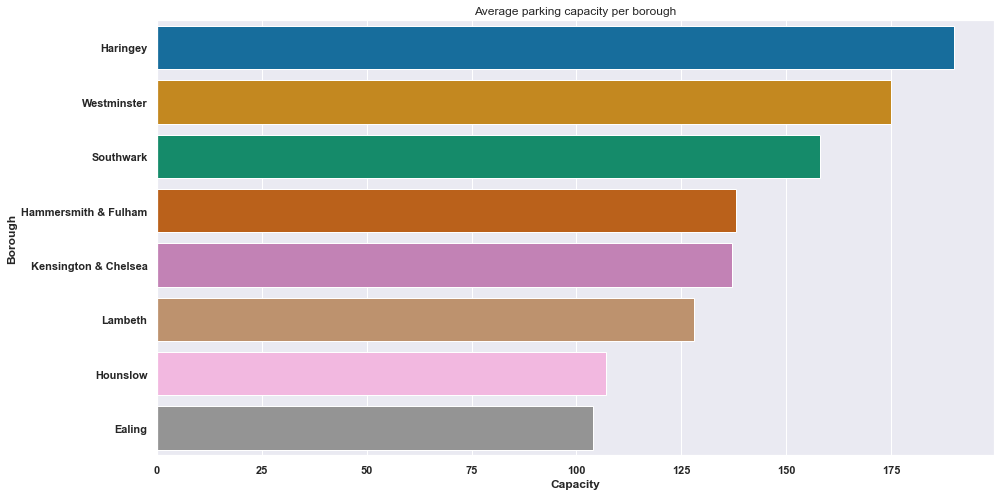

In [143]:
# The top 8 boroughs with most average parking capacity is visulasied as a bar chart.
borough_parking = borough_parking[borough_parking['Capacity'] > 103]

sns.barplot(x='Capacity', y='Borough', 
            data=borough_parking, palette='colorblind', orient='h').set(title='Average parking capacity per borough')


plt.savefig('ParkingTypeVolume.png', bbox_inches='tight', dpi=150)

### Summary and Observations

Regression analysis was performed to see if parking capacity is a predictor of cycling uptake. It only explained 4% of the variance as well as the result having a prob. f statistics of 0.11, indicating it is not statistically significant. After performing outlier analysis using box plots, we see there are 2 outliying values for number of cyclists over the upper bound, both being City of London. After excluding these values, explained variance increases to 7.5% and the result is statistically significant. 

Parking capacity has a slight positive correlation with cycling uptake, which is not enough by itself to justify increasing parking capacity, especially as severl other types of infrastructure impact cycling as well as external factors as seen by COVID. 

When observing the type of parking used, Sheffield Stands are by far the most common type, which is likely due to their ease of installation outside and with limited space. This however, means we cannot trust the correlations of types of parking and cycling uptake due to small sample sizes. 

As shown by the bar chart, Haringay, Westminster and Southwark have the higest parking capacity on average per borough, whereas Islington and Hackney, both high cycling areas, have lower parking capacity. 